In [1]:
# This notebook is to analyze the different customer profiles created 
# in the previous notebook by regions and departments

In [2]:
# Content List
#
# 01. Importing libraries and data
# 02. Preparing a subset dataframe for unique users
# 03. Analyzing customer profiles by regions and departments
# 03.01. Analyzing: age-income profile
# 03.01.01. Age-income profile by regions
# 03.01.02. Age-income profile by departments
# 03.02. Analyzing: age-family status profile
# 03.02.01. Age-family status profile by regions
# 03.02.02. Age-family status profile by departments
# 03.03. Analyzing: alcohol consumers by age profile
# 03.03.01. Alcohol consumers by age profile by regions
# 03.03.02. Alcohol consumers by age profile by departments
# 03.04. Analyzing: user household and pet ownership profile
# 03.04.01. User household and pet ownership profile by regions
# 03.04.02. User household and pet ownership profile by departments
# 03.05. Analyzing: customer buying power profile
# 03.05.01. User customer buying power profile by regions
# 03.05.02. Customer buying power profile by departments
# 03.06. Analyzing: customer preferred shopping time profile
# 03.06.01. Customer preferred shopping time profile by regions
# 03.06.02. Customer preferred shopping time profile by departments
# 03.07. Analyzing: loyalty status profile
# 03.07.01. Loyalty status profile by regions
# 03.07.02. Customer preferred shopping time profile by departments
# 04. Export data

# 01. Importing libraries and data

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Defining the default path for accessing files

path = r'/Users/bladael/Documents/Learning/CareerFoundry_DA/Data Immersion/Achievement 4/06-2023 Instacart Basket Analysis'

In [5]:
# Import data

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [6]:
# Check the shape of the loaded dataframe

ords_prods_all.shape

(30964518, 46)

In [7]:
# Change the pandas display option to view the full list of columns

pd.options.display.max_columns = None

In [10]:
# Check the head of the loaded dataframe

ords_prods_all.head()

order_id  user_id  order_sequence_number  order_days_of_week  \
0   2539329        1                      1                   2   
1   2398795        1                      2                   3   
2    473747        1                      3                   3   
3   2254736        1                      4                   4   
4    431534        1                      5                   4   

   order_hour_of_day  days_since_prior_order  product_id  add_to_cart_order  \
0                  8                     0.0         196                  1   
1                  7                    15.0         196                  1   
2                 12                    21.0         196                  1   
3                  7                    29.0         196                  1   
4                 15                    28.0         196                  1   

   reordered product_name  aisle_id  department_id  prices    price_range_loc  \
0          0         Soda        77              7     9.0  Mid-range product   
1          1         Soda        77              7     9.0  Mid-range product   
2          1         Soda        77              7     9.0  Mid-range product   
3          1         Soda        77              7     9.0  Mid-range product   
4          1         Soda        77              7     9.0  Mid-range product   

      busiest_day Busiest_Days busiest_period_of_day  max_order  loyalty_flag  \
0  Regularly busy   Normal day        Average orders         10  New customer   
1  Regularly busy  Slowest day        Average orders         10  New customer   
2  Regularly busy  Slowest day           Most orders         10  New customer   
3      Least busy  Slowest day        Average orders         10  New customer   
4      Least busy  Slowest day           Most orders         10  New customer   

   total_ord_spend  total_ord_count  avg_ord_spend spending_flag  \
0            375.7               10          37.57  High spender   
1            375.7               10          37.57  High spender   
2            375.7               10          37.57  High spender   
3            375.7               10          37.57  High spender   
4            375.7               10          37.57  High spender   

   median_frequency    frequency_flag  Gender    STATE  Age date_joined  \
0              20.0  Regular customer  Female  Alabama   31   2/17/2019   
1              20.0  Regular customer  Female  Alabama   31   2/17/2019   
2              20.0  Regular customer  Female  Alabama   31   2/17/2019   
3              20.0  Regular customer  Female  Alabama   31   2/17/2019   
4              20.0  Regular customer  Female  Alabama   31   2/17/2019   

   n_dependants fam_status  income Region customer_activity   age_bucket  \
0             3    married   40423  South  Regular-activity  Middle-aged   
1             3    married   40423  South  Regular-activity  Middle-aged   
2             3    married   40423  South  Regular-activity  Middle-aged   
3             3    married   40423  South  Regular-activity  Middle-aged   
4             3    married   40423  South  Regular-activity  Middle-aged   

  income_bucket        Age_income_level       Age_fam_status  \
0    Low income  Middle-aged Low income  Middle-aged married   
1    Low income  Middle-aged Low income  Middle-aged married   
2    Low income  Middle-aged Low income  Middle-aged married   
3    Low income  Middle-aged Low income  Middle-aged married   
4    Low income  Middle-aged Low income  Middle-aged married   

                  Age_alcohol_level       Pet_flag            household  \
0  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
1  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
2  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
3  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
4  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   

In [11]:
# Import department details to display the department name, not just department_id in the master dataframe

df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False).T.reset_index()

In [12]:
# Check the imported dataframe

df_depts

index                0
0   department_id       department
1               1           frozen
2               2            other
3               3           bakery
4               4          produce
5               5          alcohol
6               6    international
7               7        beverages
8               8             pets
9               9  dry goods pasta
10             10             bulk
11             11    personal care
12             12     meat seafood
13             13           pantry
14             14        breakfast
15             15     canned goods
16             16       dairy eggs
17             17        household
18             18           babies
19             19           snacks
20             20             deli
21             21          missing

In [13]:
# Take the correct array for the column heading

new_head = df_depts.iloc[0]

In [14]:
# Take on values from row 1 and onwards for the dataframe
df_depts = df_depts[1:]

In [15]:
# Assign the new head

df_depts.columns = new_head

In [16]:
# Check the revised dataframe

df_depts

0  department_id       department
1              1           frozen
2              2            other
3              3           bakery
4              4          produce
5              5          alcohol
6              6    international
7              7        beverages
8              8             pets
9              9  dry goods pasta
10            10             bulk
11            11    personal care
12            12     meat seafood
13            13           pantry
14            14        breakfast
15            15     canned goods
16            16       dairy eggs
17            17        household
18            18           babies
19            19           snacks
20            20             deli
21            21          missing

In [17]:
# Check the information of the dataframe to be merged

df_depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     object
 1   department     21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


In [18]:
# Check the information of the dataframe to be merged

ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964518 entries, 0 to 30964517
Data columns (total 45 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   order_id                  int64  
 1   user_id                   int64  
 2   order_sequence_number     int64  
 3   order_days_of_week        int64  
 4   order_hour_of_day         int64  
 5   days_since_prior_order    float64
 6   product_id                int64  
 7   add_to_cart_order         int64  
 8   reordered                 int64  
 9   product_name              object 
 10  aisle_id                  int64  
 11  department_id             int64  
 12  prices                    float64
 13  price_range_loc           object 
 14  busiest_day               object 
 15  Busiest_Days              object 
 16  busiest_period_of_day     object 
 17  max_order                 int64  
 18  loyalty_flag              object 
 19  total_ord_spend           float64
 20  total_ord_count       

In [19]:
# Change the 'department_id' field data type in 'df_depts' into int

df_depts['department_id'] = df_depts['department_id'].astype('int')

/var/folders/sd/bl3lrkt53x14smrncn8mblp00000gn/T/ipykernel_13232/1828109180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depts['department_id'] = df_depts['department_id'].astype('int')


In [20]:
# Check the information of 'df_depts' dataframe to check the data types again

df_depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [21]:
# Add the department name column to the master dataframe

ords_prods_all = pd.merge(ords_prods_all, df_depts, on = 'department_id', how = 'left', indicator = False)

In [22]:
# Check the shape of the master dataframe after merging

ords_prods_all.shape

(30964518, 46)

In [23]:
# Check the head of the master dataframe after merging

ords_prods_all.head()

order_id  user_id  order_sequence_number  order_days_of_week  \
0   2539329        1                      1                   2   
1   2398795        1                      2                   3   
2    473747        1                      3                   3   
3   2254736        1                      4                   4   
4    431534        1                      5                   4   

   order_hour_of_day  days_since_prior_order  product_id  add_to_cart_order  \
0                  8                     0.0         196                  1   
1                  7                    15.0         196                  1   
2                 12                    21.0         196                  1   
3                  7                    29.0         196                  1   
4                 15                    28.0         196                  1   

   reordered product_name  aisle_id  department_id  prices    price_range_loc  \
0          0         Soda        77              7     9.0  Mid-range product   
1          1         Soda        77              7     9.0  Mid-range product   
2          1         Soda        77              7     9.0  Mid-range product   
3          1         Soda        77              7     9.0  Mid-range product   
4          1         Soda        77              7     9.0  Mid-range product   

      busiest_day Busiest_Days busiest_period_of_day  max_order  loyalty_flag  \
0  Regularly busy   Normal day        Average orders         10  New customer   
1  Regularly busy  Slowest day        Average orders         10  New customer   
2  Regularly busy  Slowest day           Most orders         10  New customer   
3      Least busy  Slowest day        Average orders         10  New customer   
4      Least busy  Slowest day           Most orders         10  New customer   

   total_ord_spend  total_ord_count  avg_ord_spend spending_flag  \
0            375.7               10          37.57  High spender   
1            375.7               10          37.57  High spender   
2            375.7               10          37.57  High spender   
3            375.7               10          37.57  High spender   
4            375.7               10          37.57  High spender   

   median_frequency    frequency_flag  Gender    STATE  Age date_joined  \
0              20.0  Regular customer  Female  Alabama   31   2/17/2019   
1              20.0  Regular customer  Female  Alabama   31   2/17/2019   
2              20.0  Regular customer  Female  Alabama   31   2/17/2019   
3              20.0  Regular customer  Female  Alabama   31   2/17/2019   
4              20.0  Regular customer  Female  Alabama   31   2/17/2019   

   n_dependants fam_status  income Region customer_activity   age_bucket  \
0             3    married   40423  South  Regular-activity  Middle-aged   
1             3    married   40423  South  Regular-activity  Middle-aged   
2             3    married   40423  South  Regular-activity  Middle-aged   
3             3    married   40423  South  Regular-activity  Middle-aged   
4             3    married   40423  South  Regular-activity  Middle-aged   

  income_bucket        Age_income_level       Age_fam_status  \
0    Low income  Middle-aged Low income  Middle-aged married   
1    Low income  Middle-aged Low income  Middle-aged married   
2    Low income  Middle-aged Low income  Middle-aged married   
3    Low income  Middle-aged Low income  Middle-aged married   
4    Low income  Middle-aged Low income  Middle-aged married   

                  Age_alcohol_level       Pet_flag            household  \
0  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
1  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
2  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
3  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
4  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   

In [24]:
# Delete the list 'new_head' and dataframes 'df_depts to save memory

del new_head
del df_depts

In [25]:
# Change the figure layout for a better chart exporting

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# 02. Preparing a subset dataframe for unique users

CP: Given that the current master dataframe contains itemized details for each order where the same order number and user_id may be repeated more than once in the dataframe. For summarizing customer profiles, it may be more beneficial to have a dataset only containing the list of unique users. Thus, creating a separate dataframe only containing the unique list of users, without the order id, product, department, price details.

In [26]:
# Create a duplicate dataframe for unique users to preserve the master dataframe

users_unique = ords_prods_all

In [27]:
# Check the shape of the duplicate dataframe

users_unique.shape

(30964518, 46)

In [28]:
# Check the dataframe head

users_unique.head()

order_id  user_id  order_sequence_number  order_days_of_week  \
0   2539329        1                      1                   2   
1   2398795        1                      2                   3   
2    473747        1                      3                   3   
3   2254736        1                      4                   4   
4    431534        1                      5                   4   

   order_hour_of_day  days_since_prior_order  product_id  add_to_cart_order  \
0                  8                     0.0         196                  1   
1                  7                    15.0         196                  1   
2                 12                    21.0         196                  1   
3                  7                    29.0         196                  1   
4                 15                    28.0         196                  1   

   reordered product_name  aisle_id  department_id  prices    price_range_loc  \
0          0         Soda        77              7     9.0  Mid-range product   
1          1         Soda        77              7     9.0  Mid-range product   
2          1         Soda        77              7     9.0  Mid-range product   
3          1         Soda        77              7     9.0  Mid-range product   
4          1         Soda        77              7     9.0  Mid-range product   

      busiest_day Busiest_Days busiest_period_of_day  max_order  loyalty_flag  \
0  Regularly busy   Normal day        Average orders         10  New customer   
1  Regularly busy  Slowest day        Average orders         10  New customer   
2  Regularly busy  Slowest day           Most orders         10  New customer   
3      Least busy  Slowest day        Average orders         10  New customer   
4      Least busy  Slowest day           Most orders         10  New customer   

   total_ord_spend  total_ord_count  avg_ord_spend spending_flag  \
0            375.7               10          37.57  High spender   
1            375.7               10          37.57  High spender   
2            375.7               10          37.57  High spender   
3            375.7               10          37.57  High spender   
4            375.7               10          37.57  High spender   

   median_frequency    frequency_flag  Gender    STATE  Age date_joined  \
0              20.0  Regular customer  Female  Alabama   31   2/17/2019   
1              20.0  Regular customer  Female  Alabama   31   2/17/2019   
2              20.0  Regular customer  Female  Alabama   31   2/17/2019   
3              20.0  Regular customer  Female  Alabama   31   2/17/2019   
4              20.0  Regular customer  Female  Alabama   31   2/17/2019   

   n_dependants fam_status  income Region customer_activity   age_bucket  \
0             3    married   40423  South  Regular-activity  Middle-aged   
1             3    married   40423  South  Regular-activity  Middle-aged   
2             3    married   40423  South  Regular-activity  Middle-aged   
3             3    married   40423  South  Regular-activity  Middle-aged   
4             3    married   40423  South  Regular-activity  Middle-aged   

  income_bucket        Age_income_level       Age_fam_status  \
0    Low income  Middle-aged Low income  Middle-aged married   
1    Low income  Middle-aged Low income  Middle-aged married   
2    Low income  Middle-aged Low income  Middle-aged married   
3    Low income  Middle-aged Low income  Middle-aged married   
4    Low income  Middle-aged Low income  Middle-aged married   

                  Age_alcohol_level       Pet_flag            household  \
0  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
1  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
2  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
3  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   
4  Middle-aged Non-alcohol consumer  Non-pet owner  Multi-member family   

In [29]:
# Deleting the columns that are not related to customer-level profiles, then remove the duplicate rows

users_unique = users_unique.drop(columns = ['order_id', 'order_sequence_number', 'order_days_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day', 'Busiest_Days', 'busiest_period_of_day', 'order_time', 'department']).drop_duplicates()

In [30]:
# Check the shape of the subset of unique users

users_unique.shape

(162627, 28)

In [31]:
# Compare the count of unique user ids from the master dataframe to see whether it matches the total rows above

ords_prods_all['user_id'].nunique(dropna = False)

162627

# 03. Analyzing customer profiles by regions and departments

## 03.01. Analyzing: age-income profile

In [32]:
# Review the head to select the appropriate field for the calculation

users_unique.head()

user_id  max_order      loyalty_flag  total_ord_spend  total_ord_count  \
0          1         10      New customer            375.7               10   
59        15         22  Regular customer            286.6               22   
131       19          9      New customer           1707.9                9   
335       21         33  Regular customer           1437.6               33   
540       31         20  Regular customer           2433.2               20   

     avg_ord_spend spending_flag  median_frequency     frequency_flag  Gender  \
0        37.570000  High spender              20.0   Regular customer  Female   
59       13.027273  High spender               8.0  Frequent customer  Female   
131     189.766667  High spender               6.0  Frequent customer  Female   
335      43.563636  High spender               7.0  Frequent customer    Male   
540     121.660000  High spender               6.0  Frequent customer  Female   

         STATE  Age date_joined  n_dependants        fam_status  income  \
0      Alabama   31   2/17/2019             3           married   40423   
59     Indiana   69    6/3/2019             0  divorced/widowed   54313   
131  Louisiana   62    2/3/2017             1           married  151988   
335    Montana   71   6/18/2019             0  divorced/widowed  124643   
540   Oklahoma   38   1/22/2019             1           married   52311   

      Region customer_activity   age_bucket  income_bucket  \
0      South  Regular-activity  Middle-aged     Low income   
59   Midwest  Regular-activity       Senior     Low income   
131    South  Regular-activity  Middle-aged    High income   
335     West  Regular-activity       Senior  Middle income   
540    South  Regular-activity  Middle-aged     Low income   

            Age_income_level           Age_fam_status  \
0     Middle-aged Low income      Middle-aged married   
59         Senior Low income  Senior divorced/widowed   
131  Middle-aged High income      Middle-aged married   
335     Senior Middle income  Senior divorced/widowed   
540   Middle-aged Low income      Middle-aged married   

                    Age_alcohol_level       Pet_flag             household  \
0    Middle-aged Non-alcohol consumer  Non-pet owner   Multi-member family   
59        Senior Non-alcohol consumer  Non-pet owner  Single-member family   
131  Middle-aged Non-alcohol consumer  Non-pet owner   Multi-member family   
335           Senior Alcohol consumer  Non-pet owner  Single-member family   
540      Middle-aged Alcohol consumer  Non-pet owner   Multi-member family   

                          Pet_household                    buying_power  \
0     Multi-member family Non-pet owner  Dual income with multiple kids   
59   Single-member family Non-pet owner      Single income with no kids   
131   Multi-member family Non-pet owner     Dual income with single kid   
335  Single-member family Non-pet owner      Single income with no kids   
540   Multi-member family Non-pet owner     Dual income with single kid   

      user_preferred_shop_time  
0      Weekday morning shopper  
59   Weekday afternoon shopper  
131  Weekday afternoon shopper  
335  Weekend afternoon shopper  
540  Weekday afternoon shopper

### 03.01.01. Age-income profile by regions

In [33]:
# Create a crosstab using with the two variables

crosstab_ageinc_reg = pd.crosstab(users_unique['Region'], users_unique['Age_income_level'], dropna = False)

In [34]:
# Check the crosstab created

crosstab_ageinc_reg

Age_income_level  Middle-aged High income  Middle-aged Low income  \
Region                                                              
Midwest                              3950                    4286   
Northeast                            2959                    3218   
South                                5362                    6122   
West                                 4222                    4630   

Age_income_level  Middle-aged Middle income  Senior High income  \
Region                                                            
Midwest                               14076                1966   
Northeast                             10414                1488   
South                                 19632                2900   
West                                  14975                2207   

Age_income_level  Senior Low income  Senior Middle income  \
Region                                                      
Midwest                        1237                  5204   
Northeast                       906                  3846   
South                          1810                  7249   
West                           1423                  5540   

Age_income_level  Young adult High income  Young adult Low income  \
Region                                                              
Midwest                                57                    2302   
Northeast                              37                    1784   
South                                  79                    3355   
West                                   57                    2592   

Age_income_level  Young adult Middle income  
Region                                       
Midwest                                5297  
Northeast                              3928  
South                                  7682  
West                                   5835

In [35]:
# Export the crosstab

crosstab_ageinc_reg.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_customers_by_age_income_level_and_region.csv'))

In [36]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_ageinc_reg_prop = pd.crosstab(users_unique['Region'], users_unique['Age_income_level'], normalize = 'index', dropna = False)

In [37]:
# Check the crosstab created

crosstab_ageinc_reg_prop

Age_income_level  Middle-aged High income  Middle-aged Low income  \
Region                                                              
Midwest                          0.102932                0.111687   
Northeast                        0.103534                0.112596   
South                            0.098946                0.112971   
West                             0.101782                0.111617   

Age_income_level  Middle-aged Middle income  Senior High income  \
Region                                                            
Midwest                            0.366801            0.051231   
Northeast                          0.364381            0.052064   
South                              0.362274            0.053514   
West                               0.361009            0.053205   

Age_income_level  Senior Low income  Senior Middle income  \
Region                                                      
Midwest                    0.032235              0.135609   
Northeast                  0.031700              0.134570   
South                      0.033400              0.133768   
West                       0.034305              0.133555   

Age_income_level  Young adult High income  Young adult Low income  \
Region                                                              
Midwest                          0.001485                0.059987   
Northeast                        0.001295                0.062421   
South                            0.001458                0.061911   
West                             0.001374                0.062486   

Age_income_level  Young adult Middle income  
Region                                       
Midwest                            0.138033  
Northeast                          0.137439  
South                              0.141758  
West                               0.140667

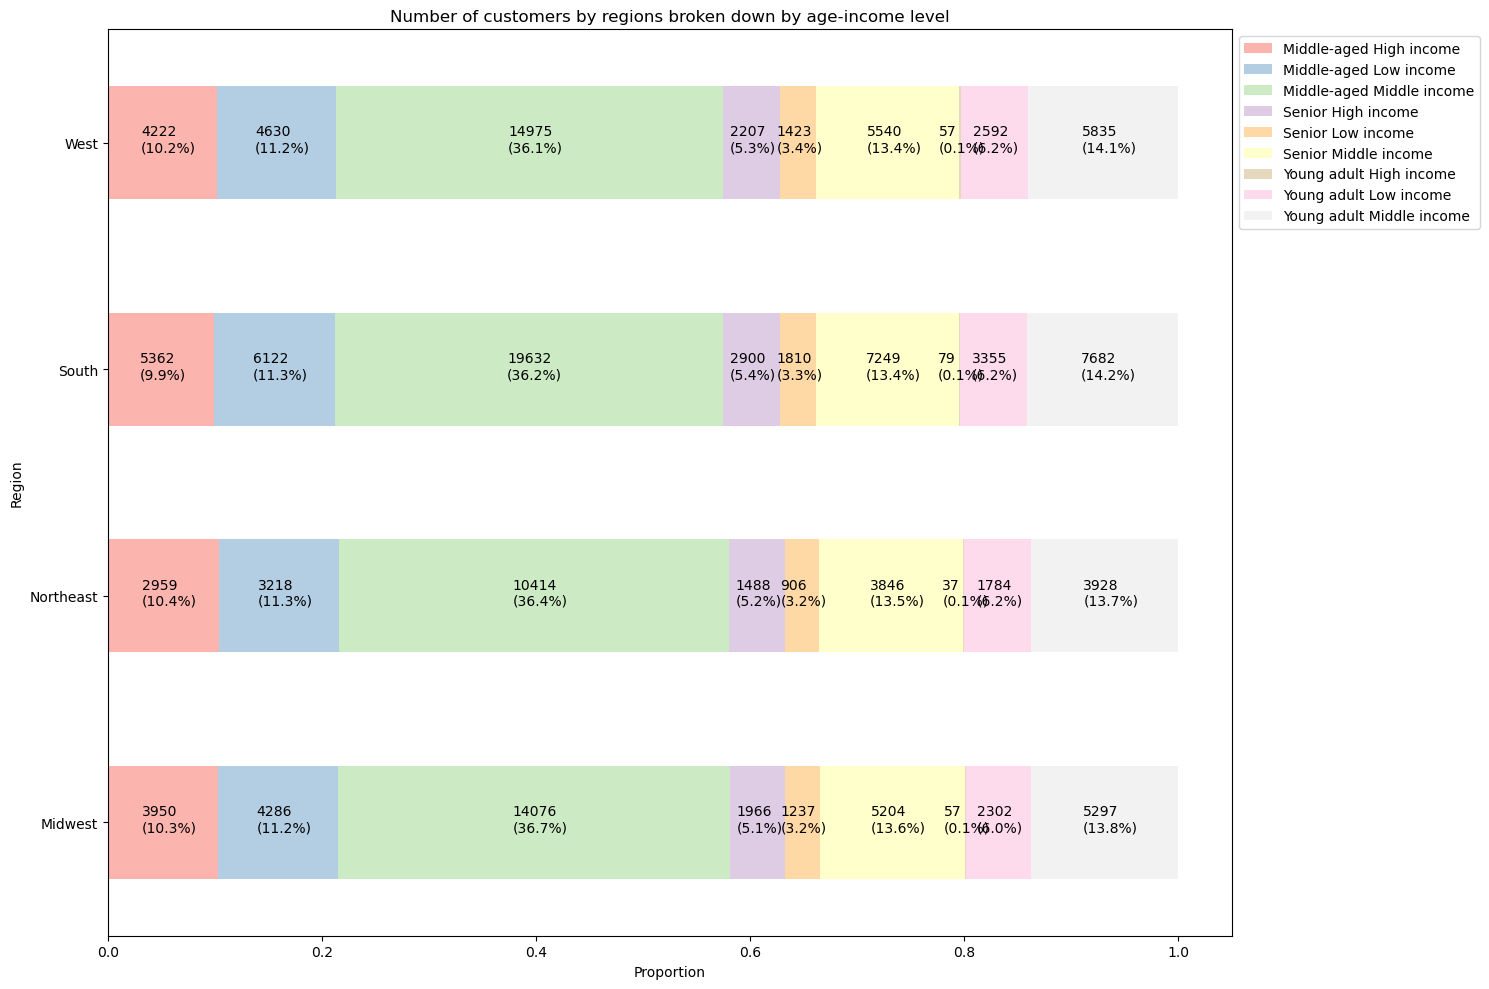

In [38]:
# Create a bar chart using the crosstab results

bar_ageinc_reg = crosstab_ageinc_reg_prop.plot.barh(title = 'Number of customers by regions broken down by age-income level', rot=0, figsize = (15,10), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Region")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_ageinc_reg.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_ageinc_reg_prop.loc[x], crosstab_ageinc_reg.loc[x], crosstab_ageinc_reg_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.02, y=n - 0.04, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [39]:
# Export the chart

bar_ageinc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_age_income.png'))

### 03.01.02. Age-income profile by departments

In [40]:
# Create a crosstab using with the two variables

crosstab_ageinc_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['Age_income_level'], dropna = False)

In [41]:
# Check the crosstab created

crosstab_ageinc_dep

Age_income_level  Middle-aged High income  Middle-aged Low income  \
department                                                          
alcohol                             18177                   13294   
babies                              47178                   23514   
bakery                             127771                   82243   
beverages                          268185                  272061   
breakfast                           71385                   66842   
bulk                                 3318                    3519   
canned goods                       117511                   64246   
dairy eggs                         574804                  387438   
deli                               110207                   81491   
dry goods pasta                     92555                   52399   
frozen                             237012                  162860   
household                           78038                   63376   
international                       28755                   17180   
meat seafood                        79040                   30925   
missing                              7092                    5117   
other                                3833                    2978   
pantry                             201187                  129099   
personal care                       45922                   35388   
pets                                10868                    6469   
produce                            999237                  659253   
snacks                             262322                  390017   

Age_income_level  Middle-aged Middle income  Senior High income  \
department                                                        
alcohol                               51677                9511   
babies                               167235               23769   
bakery                               437918               64814   
beverages                            942758              140073   
breakfast                            248909               36588   
bulk                                  12156                1596   
canned goods                         401474               57449   
dairy eggs                          2021028              291247   
deli                                 387839               55478   
dry goods pasta                      327841               47421   
frozen                               821661              120698   
household                            261190               40494   
international                        101869               14378   
meat seafood                         278477               40778   
missing                               24811                3630   
other                                 12934                1905   
pantry                               700245              101988   
personal care                        164300               23943   
pets                                  35308                5630   
produce                             3581099              509838   
snacks                               941765              134838   

Age_income_level  Senior Low income  Senior Middle income  \
department                                                  
alcohol                        3466                 18066   
babies                         5336                 59286   
bakery                        20827                159658   
beverages                     83848                345733   
breakfast                     19953                 89536   
bulk                            991                  4911   
canned goods                  15189                147959   
dairy eggs                   102754                743634   
deli                          20737                144326   
dry goods pasta               11842                120970   
frozen                        43830                304343   
household                     18498                 96442   
international   

In [42]:
# Export the crosstab

crosstab_ageinc_dep.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_orders_by_age_income_level_and_department.csv'))

In [43]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_ageinc_dep_prop = pd.crosstab(ords_prods_all['department'], ords_prods_all['Age_income_level'], normalize = 'index', dropna = False)

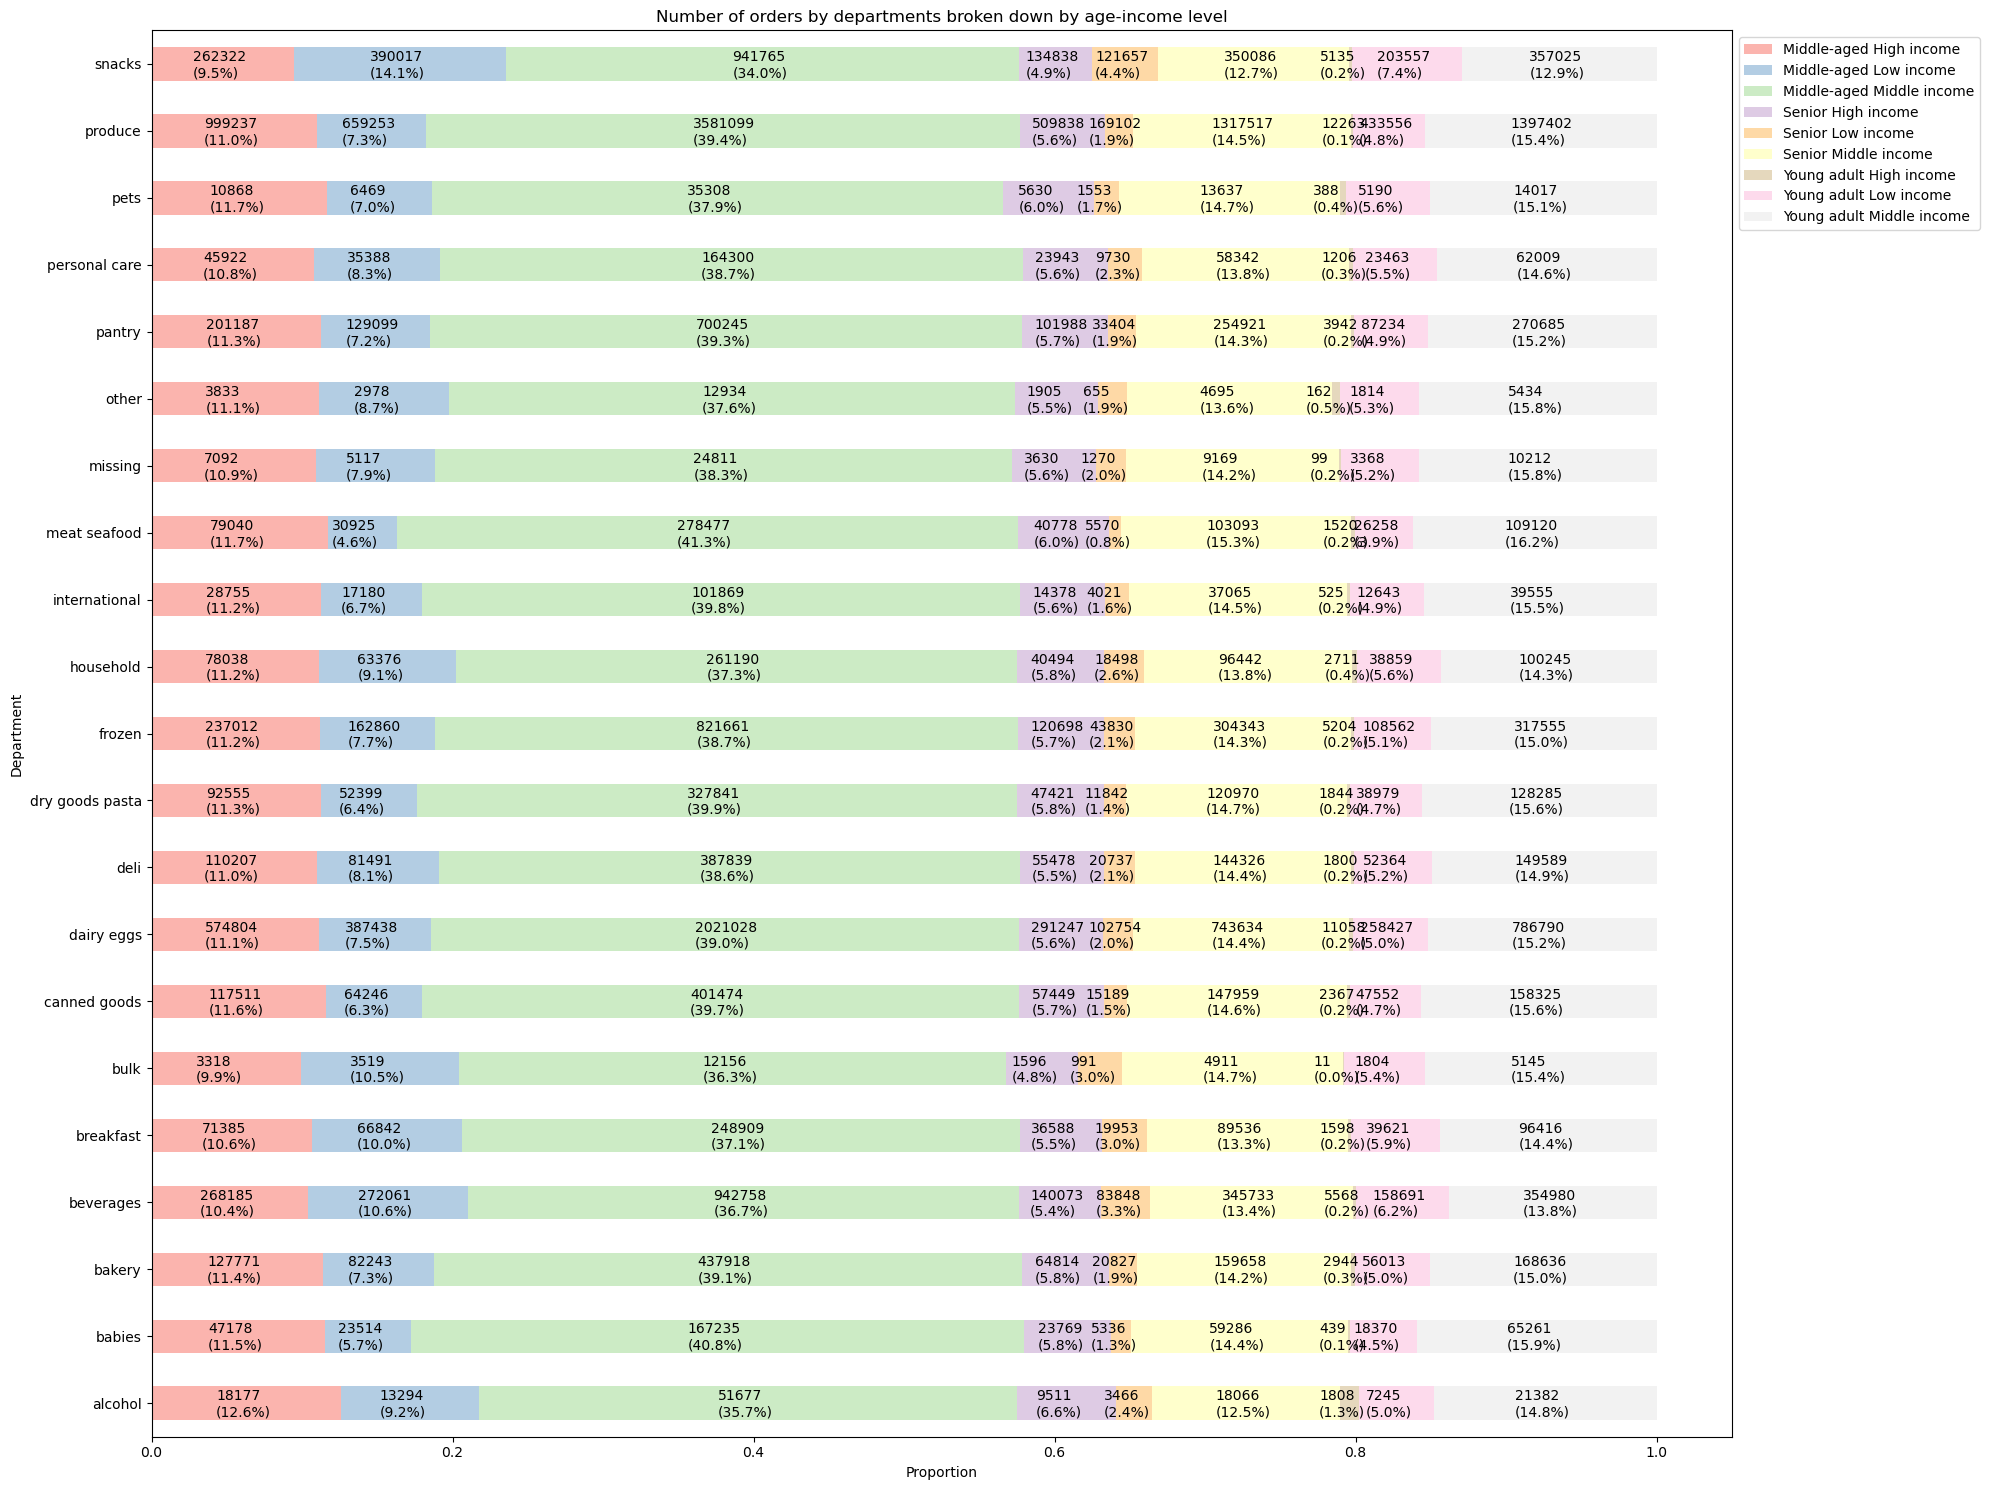

In [44]:
# Create a bar chart using the crosstab results

bar_ageinc_dep = crosstab_ageinc_dep_prop.plot.barh(title = 'Number of orders by departments broken down by age-income level', rot=0, figsize = (20,15), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Department")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_ageinc_dep.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_ageinc_dep_prop.loc[x], crosstab_ageinc_dep.loc[x], crosstab_ageinc_dep_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.02, y=n - 0.2, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [45]:
# Export the chart

bar_ageinc_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_age_income.png'))

## 03.02. Analyzing: age-family status profile

### 03.02.01. Age-family status profile by regions

In [46]:
# Create a crosstab using with the two variables

crosstab_agefam_reg = pd.crosstab(users_unique['Region'], users_unique['Age_fam_status'], dropna = False)

In [47]:
# Check the crosstab created

crosstab_agefam_reg

Age_fam_status  Middle-aged divorced/widowed  Middle-aged married  \
Region                                                              
Midwest                                 1143                16700   
Northeast                                888                12445   
South                                   1730                23299   
West                                    1246                17863   

Age_fam_status  Middle-aged single  Senior divorced/widowed  Senior married  \
Region                                                                        
Midwest                       4469                     2064            6343   
Northeast                     3258                     1583            4657   
South                         6087                     2875            9084   
West                          4718                     2302            6868   

Age_fam_status  Young adult living with parents and siblings  \
Region                                                         
Midwest                                                 1840   
Northeast                                               1226   
South                                                   2604   
West                                                    1938   

Age_fam_status  Young adult married  Young adult single  
Region                                                   
Midwest                        3927                1889  
Northeast                      2997                1526  
South                          5668                2844  
West                           4443                2103

In [48]:
# Export the crosstab

crosstab_agefam_reg.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_customers_by_age_family_status_and_region.csv'))

In [49]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_agefam_reg_prop = pd.crosstab(users_unique['Region'], users_unique['Age_fam_status'], normalize = 'index', dropna = False)

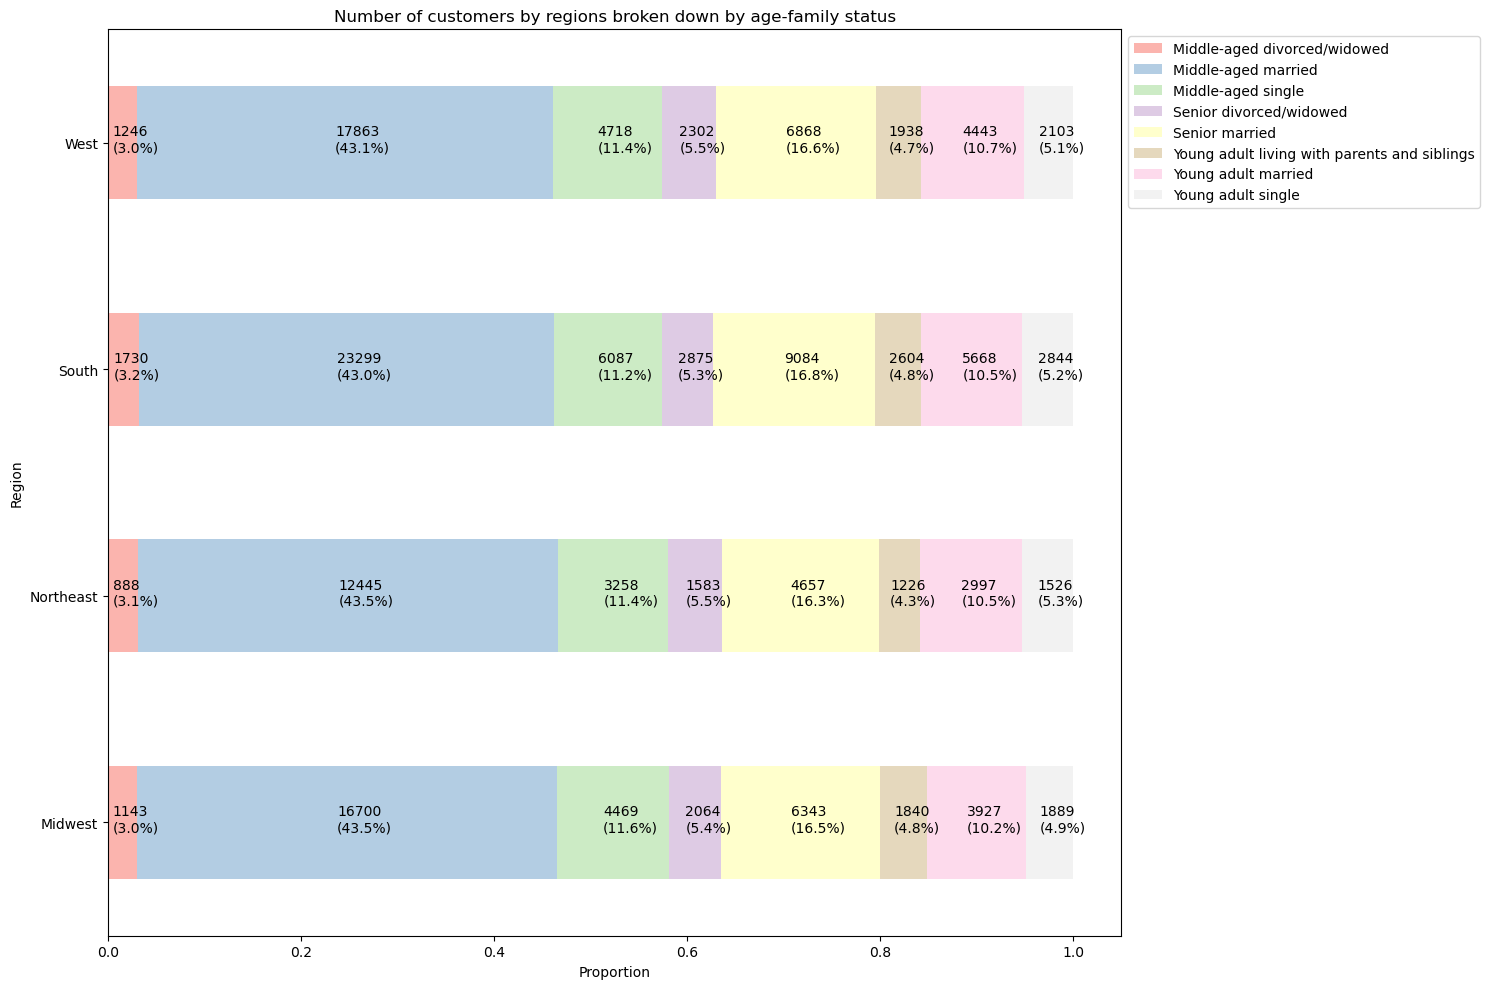

In [50]:
# Create a bar chart using the crosstab results

bar_agefam_reg = crosstab_agefam_reg_prop.plot.barh(title = 'Number of customers by regions broken down by age-family status', rot=0, figsize = (15,10), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Region")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_agefam_reg.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_agefam_reg_prop.loc[x], crosstab_agefam_reg.loc[x], crosstab_agefam_reg_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.01, y=n - 0.04, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [51]:
# Export the chart

bar_agefam_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_age_family.png'))

### 03.02.02. Age-family status profile by departments

In [52]:
# Create a crosstab using with the two variables

crosstab_agefam_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['Age_fam_status'], dropna = False)

In [53]:
# Check the crosstab created

crosstab_agefam_dep

Age_fam_status   Middle-aged divorced/widowed  Middle-aged married  \
department                                                           
alcohol                                  4099                61126   
babies                                  13270               177988   
bakery                                  35584               483530   
beverages                               81158              1108224   
breakfast                               22075               289012   
bulk                                      935                14412   
canned goods                            31182               437093   
dairy eggs                             161825              2230966   
deli                                    32223               431550   
dry goods pasta                         26029               355256   
frozen                                  66818               914482   
household                               20882               304310   
international                            8167               110540   
meat seafood                            21070               292744   
missing                                  1835                27795   
other                                    1097                14558   
pantry                                  55933               773117   
personal care                           12802               184847   
pets                                     2338                39563   
produce                                284443              3920322   
snacks                                  87219              1193168   

Age_fam_status   Middle-aged single  Senior divorced/widowed  Senior married  \
department                                                                     
alcohol                       17923                     7760           23283   
babies                        46669                    21081           67310   
bakery                       128818                    60151          185148   
beverages                    293622                   139721          429933   
breakfast                     76049                    34515          111562   
bulk                           3646                     1741            5757   
canned goods                 114956                    53086          167511   
dairy eggs                   590479                   280777          856858   
deli                         115764                    54526          166015   
dry goods pasta               91510                    44222          136011   
frozen                       240233                   117139          351732   
household                     77412                    37564          117870   
international                 29097                    13647           41817   
meat seafood                  74628                    36551          112890   
missing                        7390                     3229           10840   
other                          4090                     1745            5510   
pantry                       201481                    95958          294355   
personal care                 47961                    23511           68504   
pets                          10744                     5687           15133   
produce                     1034824                   492651         1503806   
snacks                       313717                   149025          457556   

Age_fam_status   Young adult living with parents and siblings  \
department                                                      
alcohol                                                  8379   
babies                                                  19381   
bakery                                                  53684   
beverages                                              119107   
breakfast                                               33198   
bulk                                                     1633   
canned goods                

In [54]:
# Export the crosstab

crosstab_agefam_dep.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_orders_by_age_family_status_and_department.csv'))

In [55]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_agefam_dep_prop = pd.crosstab(ords_prods_all['department'], ords_prods_all['Age_fam_status'], normalize = 'index', dropna = False)

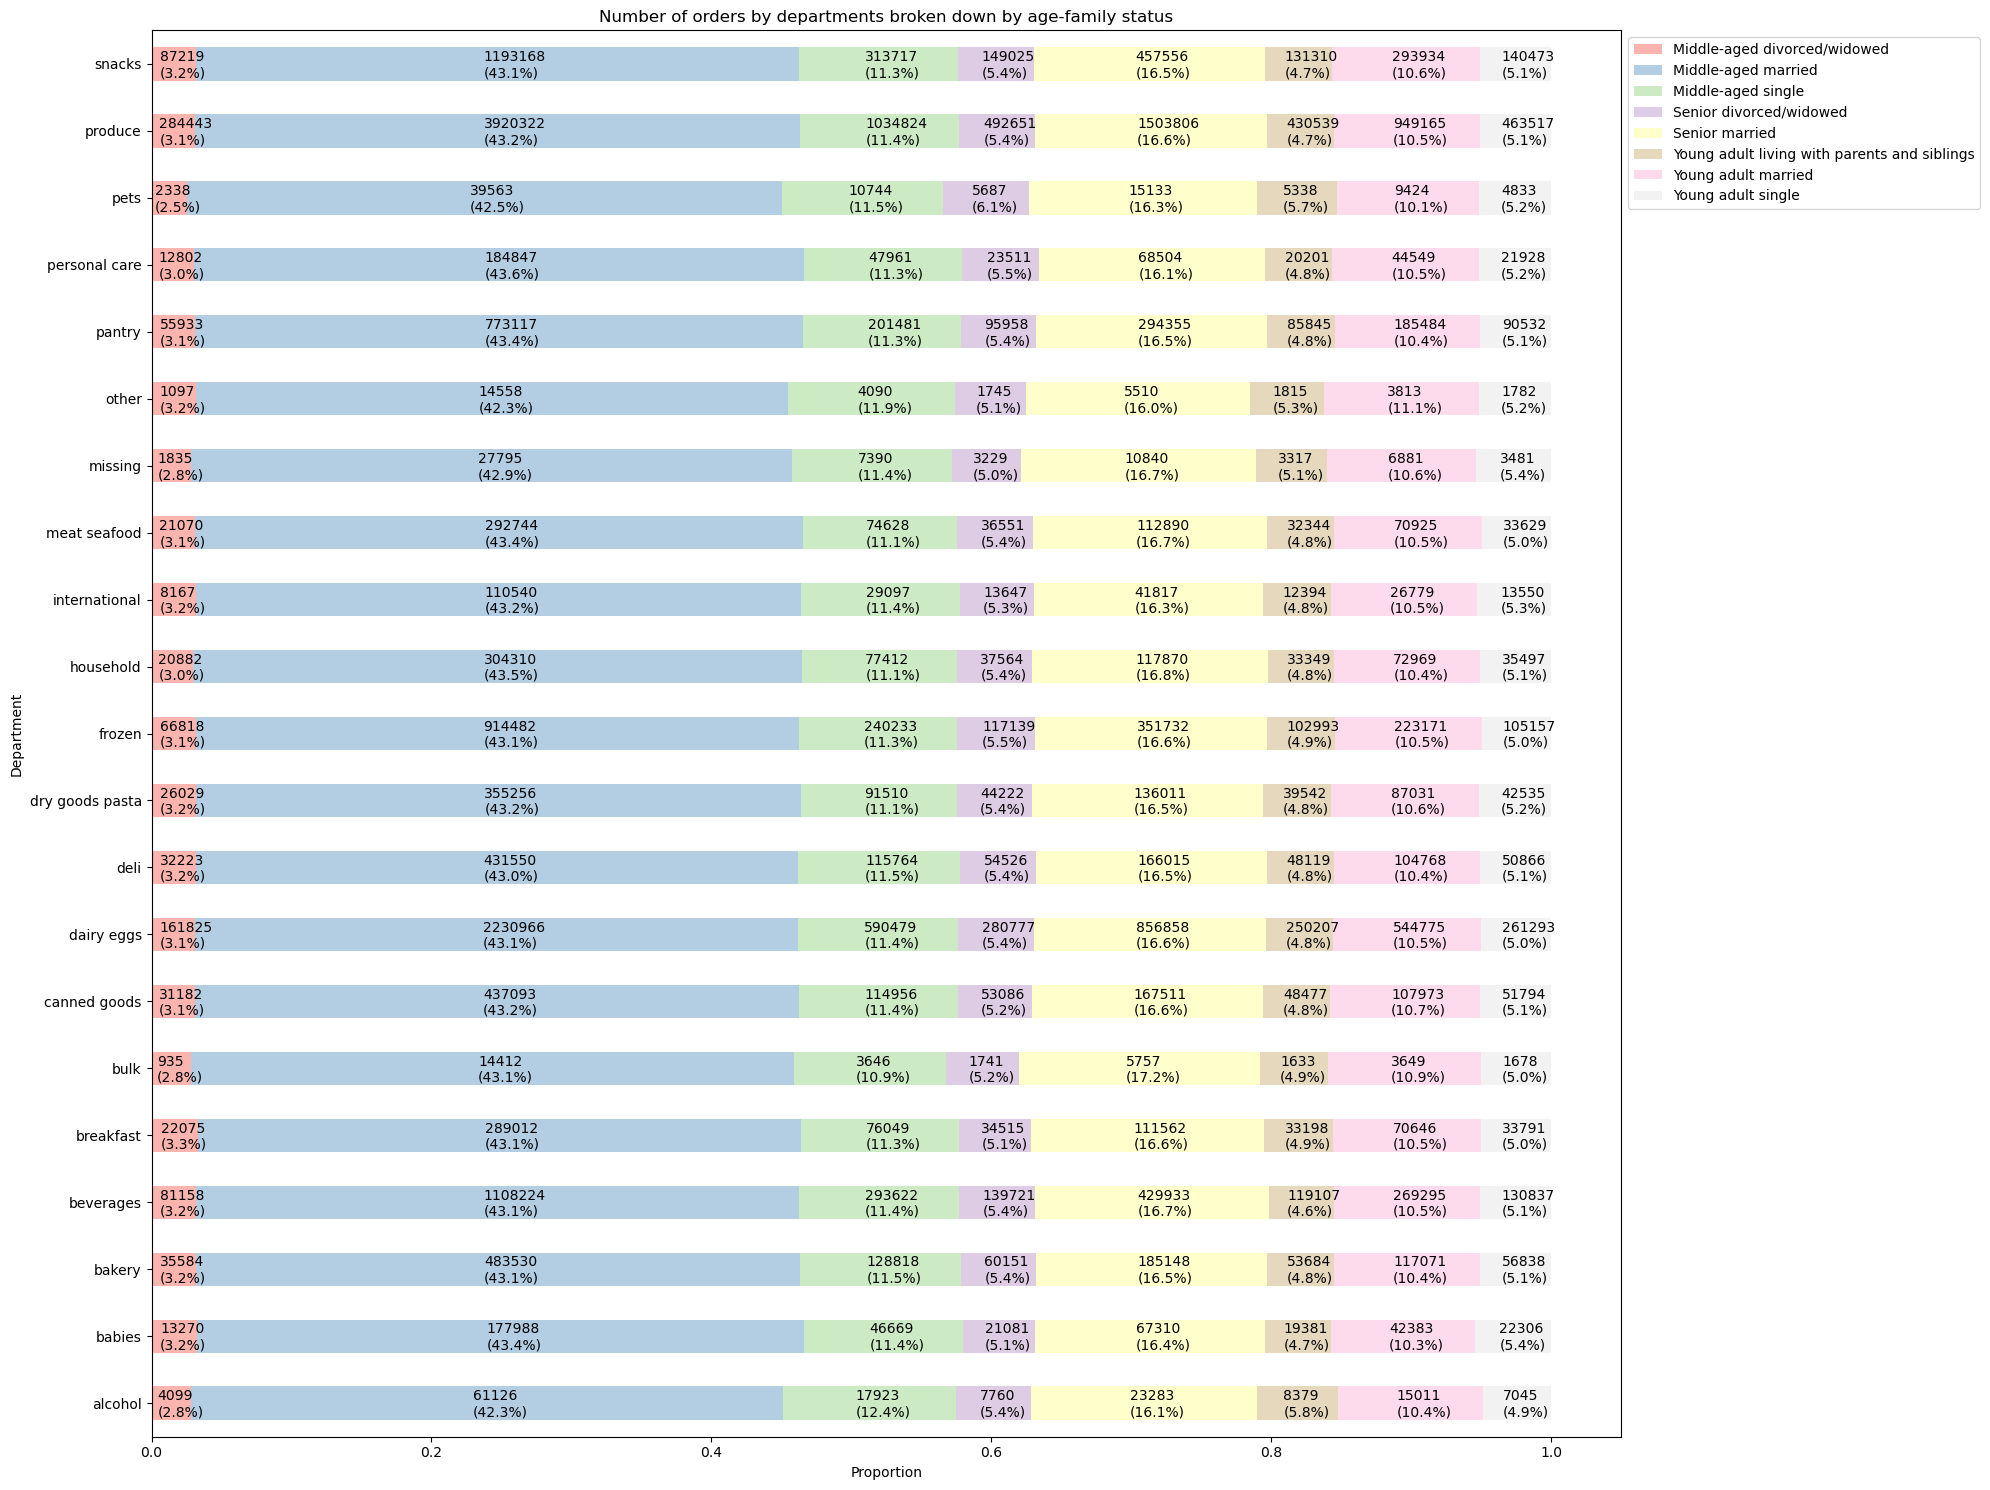

In [56]:
# Create a bar chart using the crosstab results

bar_agefam_dep = crosstab_agefam_dep_prop.plot.barh(title = 'Number of orders by departments broken down by age-family status', rot=0, figsize = (20,15), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Department")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_agefam_dep.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_agefam_dep_prop.loc[x], crosstab_agefam_dep.loc[x], crosstab_agefam_dep_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.01, y=n - 0.2, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [57]:
# Export the chart

bar_agefam_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_age_family_status.png'))

## 03.03. Analyzing: alcohol consumers by age profile

### 03.03.01. Alcohol consumers by age profile by regions

In [58]:
# Create a crosstab using with the two variables

crosstab_aa_reg = pd.crosstab(users_unique['Region'], users_unique['Age_alcohol_level'], dropna = False)

In [59]:
# Check the crosstab created

crosstab_aa_reg

Age_alcohol_level  Middle-aged Alcohol consumer  \
Region                                            
Midwest                                    1788   
Northeast                                  1345   
South                                      2526   
West                                       1965   

Age_alcohol_level  Middle-aged Non-alcohol consumer  Senior Alcohol consumer  \
Region                                                                         
Midwest                                       20524                      674   
Northeast                                     15246                      462   
South                                         28590                     1027   
West                                          21862                      706   

Age_alcohol_level  Senior Non-alcohol consumer  Young adult Alcohol consumer  \
Region                                                                         
Midwest                                   7733                           620   
Northeast                                 5778                           472   
South                                    10932                           891   
West                                      8464                           674   

Age_alcohol_level  Young adult Non-alcohol consumer  
Region                                               
Midwest                                        7036  
Northeast                                      5277  
South                                         10225  
West                                           7810

In [60]:
# Export the crosstab

crosstab_aa_reg.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_customers_by_age_alcohol_consumption_and_region.csv'))

In [61]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_aa_reg_prop = pd.crosstab(users_unique['Region'], users_unique['Age_alcohol_level'], normalize = 'index', dropna = False)

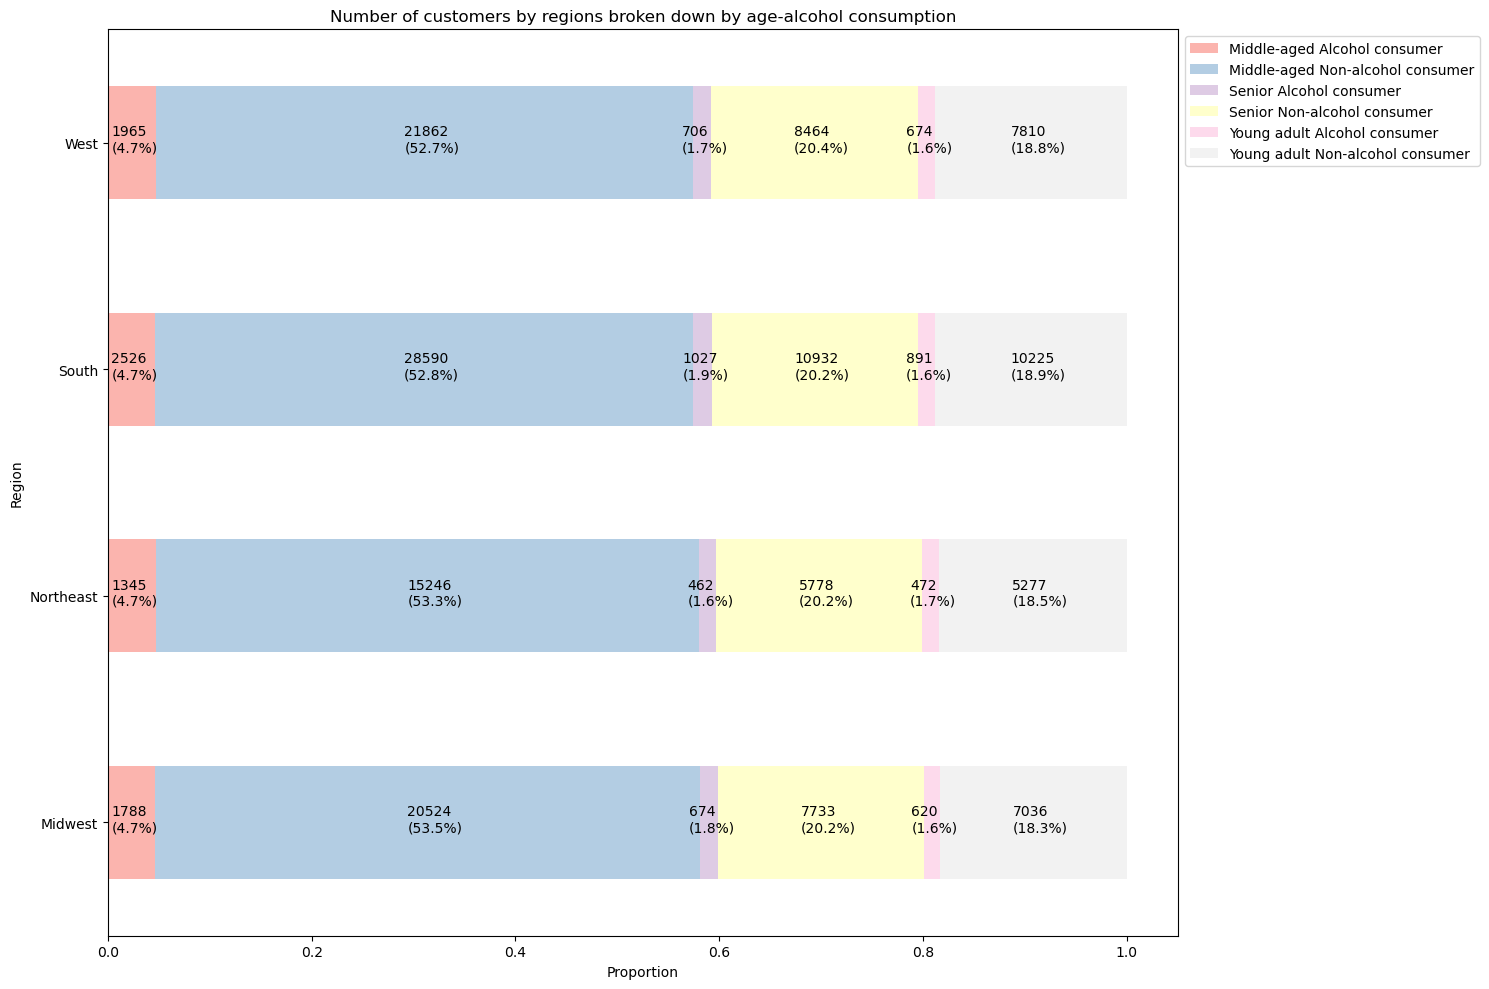

In [62]:
# Create a bar chart using the crosstab results

bar_aa_reg = crosstab_aa_reg_prop.plot.barh(title = 'Number of customers by regions broken down by age-alcohol consumption', rot=0, figsize = (15,10), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Region")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_aa_reg.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_aa_reg_prop.loc[x], crosstab_aa_reg.loc[x], crosstab_aa_reg_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.02, y=n - 0.04, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [63]:
# Export the chart

bar_aa_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_age_alcohol.png'))

### 03.03.02. Alcohol consumers by age profile by departments

In [64]:
# Create a crosstab using with the two variables

crosstab_aa_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['Age_alcohol_level'], dropna = False)

In [65]:
# Check the crosstab created

crosstab_aa_dep

Age_alcohol_level  Middle-aged Alcohol consumer  \
department                                        
alcohol                                   83148   
babies                                     9049   
bakery                                    60505   
beverages                                145154   
breakfast                                 30907   
bulk                                        214   
canned goods                              47704   
dairy eggs                               204192   
deli                                      37438   
dry goods pasta                           37492   
frozen                                    93214   
household                                 60293   
international                             11984   
meat seafood                              30097   
missing                                    1596   
other                                      3542   
pantry                                    89376   
personal care                             23332   
pets                                       9813   
produce                                  244492   
snacks                                   125300   

Age_alcohol_level  Middle-aged Non-alcohol consumer  Senior Alcohol consumer  \
department                                                                     
alcohol                                           0                    31043   
babies                                       228878                     3001   
bakery                                       587427                    23346   
beverages                                   1337850                    55404   
breakfast                                    356229                    11419   
bulk                                          18779                      110   
canned goods                                 535527                    16761   
dairy eggs                                  2779078                    75221   
deli                                         542099                    13803   
dry goods pasta                              435303                    14308   
frozen                                      1128319                    34745   
household                                    342311                    22314   
international                                135820                     4390   
meat seafood                                 358345                    11682   
missing                                       35424                      640   
other                                         16203                     1361   
pantry                                       941155                    33295   
personal care                                222278                     8092   
pets                                          42832                     4144   
produce                                     4995097                    91398   
snacks                                      1468804                    45674   

Age_alcohol_level  Senior Non-alcohol consumer  Young adult Alcohol consumer  \
department                                                                     
alcohol                                      0                         30435   
babies                                   85390                          3532   
bakery                                  221953                         22046   
beverages                               514250                         52018   
breakfast                               134658                         10985   
bulk                                      7388                           144   
canned goods                            203836                         16128   
dairy eggs                             1062414                         73434   
deli                                    206738                         12694   
dry goods pasta                         165925                         13163   
frozen                   

In [66]:
# Export the crosstab

crosstab_aa_dep.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_orders_by_age_alcohol_status_and_department.csv'))

In [67]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_aa_dep_prop = pd.crosstab(ords_prods_all['department'], ords_prods_all['Age_alcohol_level'], normalize = 'index', dropna = False)

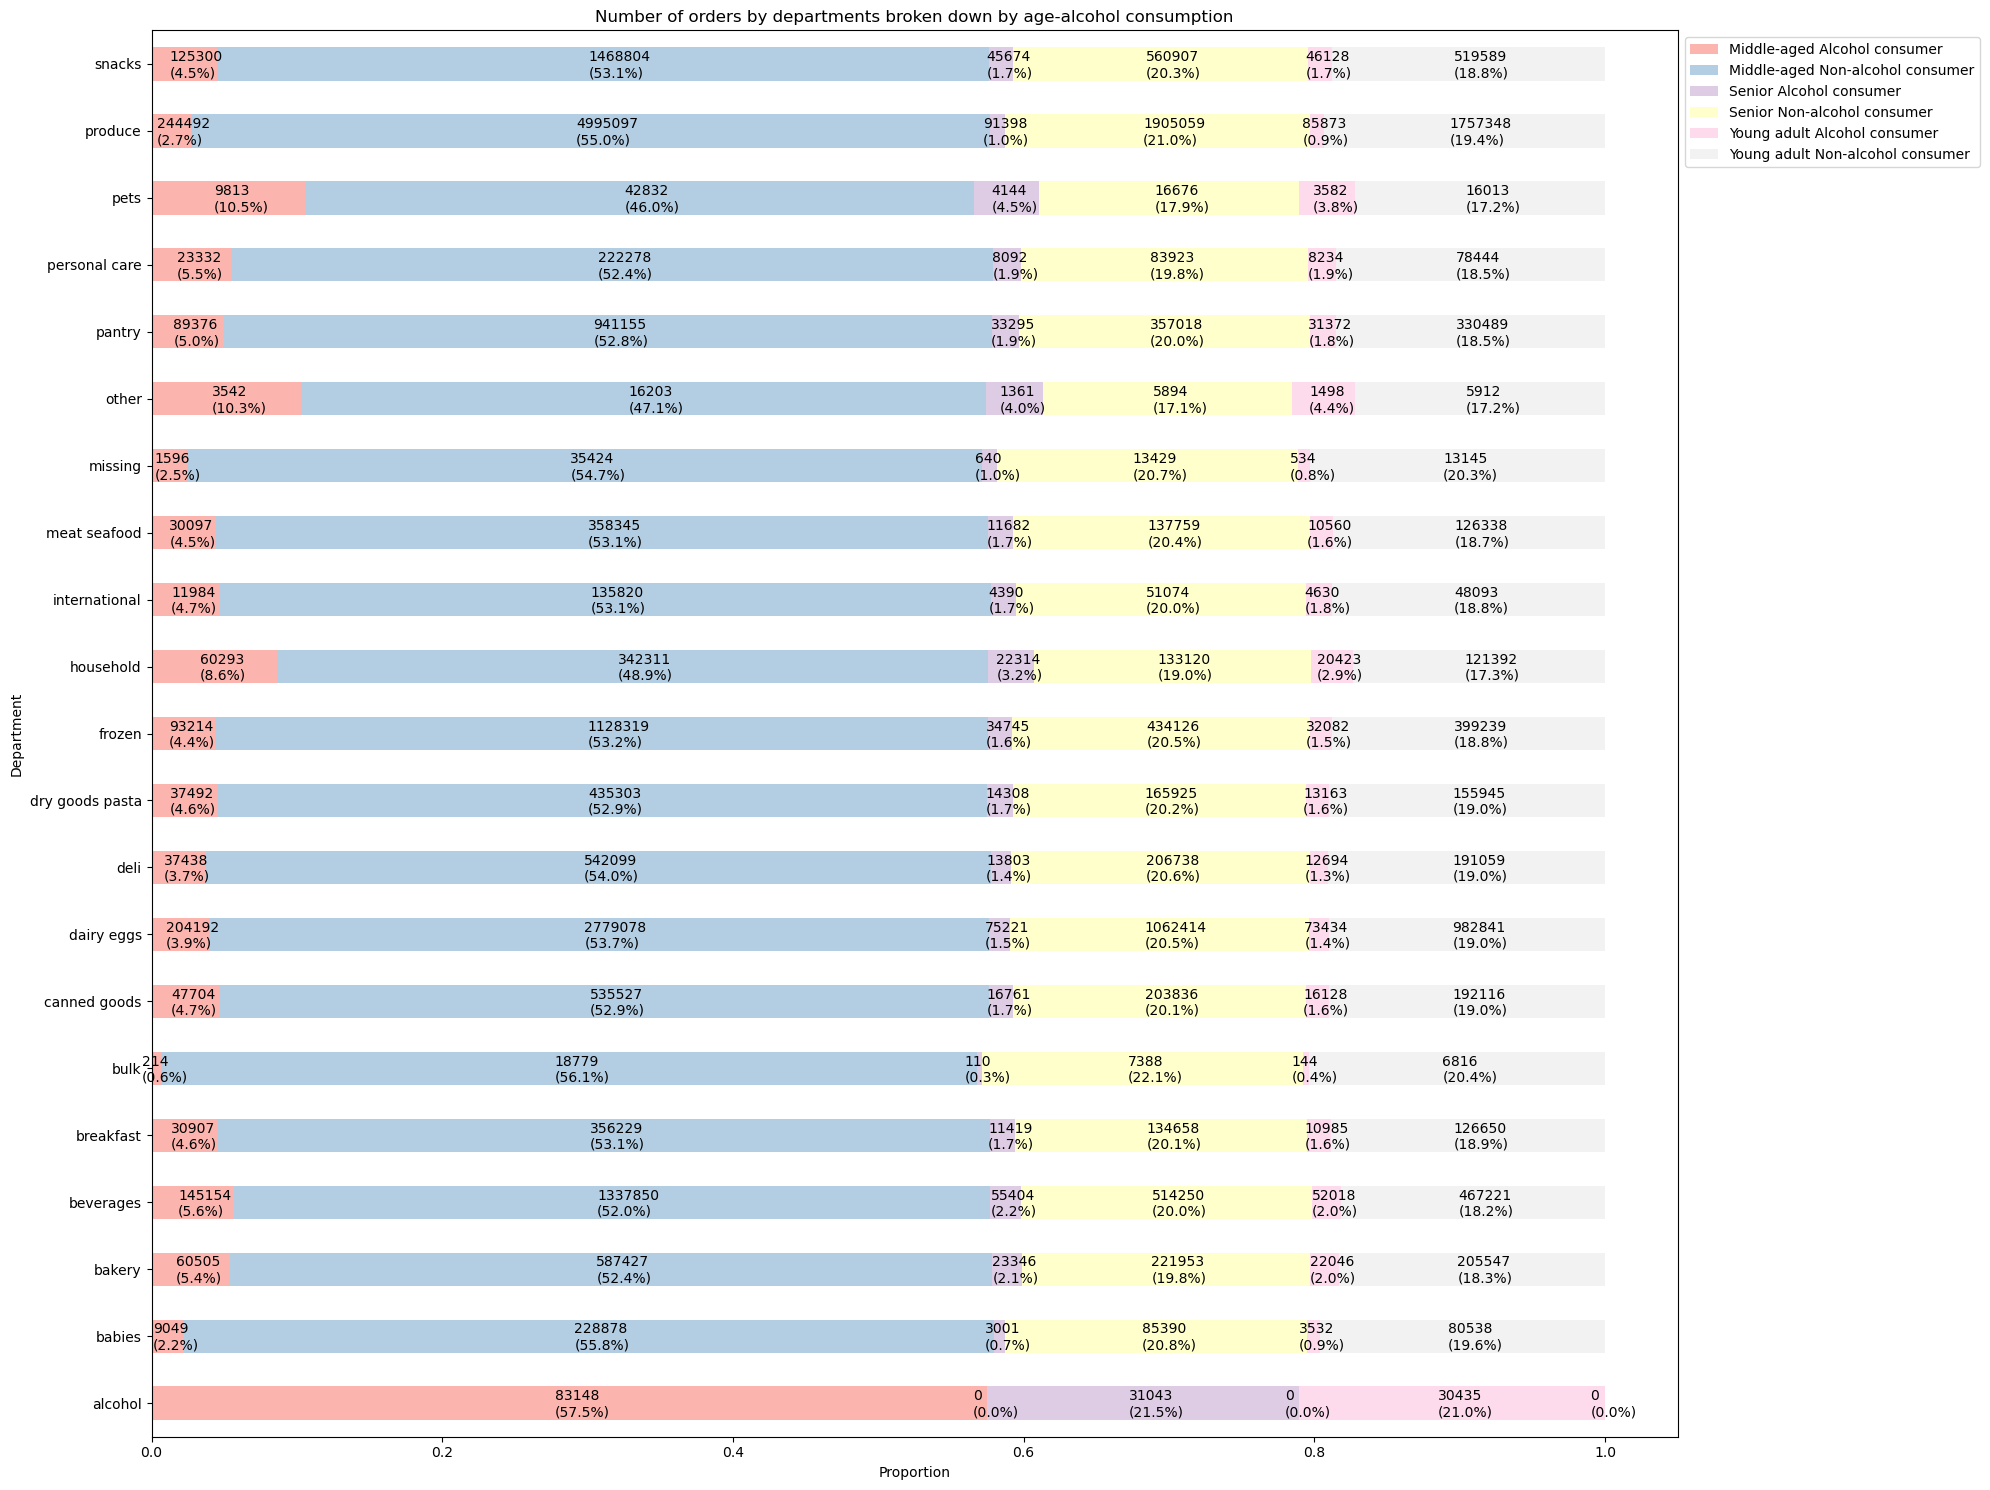

In [68]:
# Create a bar chart using the crosstab results

bar_aa_dep = crosstab_aa_dep_prop.plot.barh(title = 'Number of orders by departments broken down by age-alcohol consumption', rot=0, figsize = (20,15), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Department")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_aa_dep.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_aa_dep_prop.loc[x], crosstab_aa_dep.loc[x], crosstab_aa_dep_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.01, y=n - 0.2, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [69]:
# Export the chart

bar_aa_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_age_alcohol_consumption.png'))

## 03.04. Analyzing: user household and pet ownership profile

### 03.04.01. User household and pet ownership profile by regions

In [70]:
# Create a crosstab using with the two variables

crosstab_ph_reg = pd.crosstab(users_unique['Region'], users_unique['Pet_household'], dropna = False)

In [71]:
# Check the crosstab created

crosstab_ph_reg

Pet_household  Multi-member family Non-pet owner  \
Region                                             
Midwest                                    26435   
Northeast                                  19613   
South                                      37421   
West                                       28526   

Pet_household  Multi-member family Pet owner  \
Region                                         
Midwest                                 2375   
Northeast                               1712   
South                                   3234   
West                                    2586   

Pet_household  Single-member family Non-pet owner  \
Region                                              
Midwest                                      8827   
Northeast                                    6668   
South                                       12445   
West                                         9517   

Pet_household  Single-member family Pet owner  
Region                                         
Midwest                                   738  
Northeast                                 587  
South                                    1091  
West                                      852

In [72]:
# Export the crosstab

crosstab_ph_reg.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_customers_by_pet_household_and_region.csv'))

In [73]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_ph_reg_prop = pd.crosstab(users_unique['Region'], users_unique['Pet_household'], normalize = 'index', dropna = False)

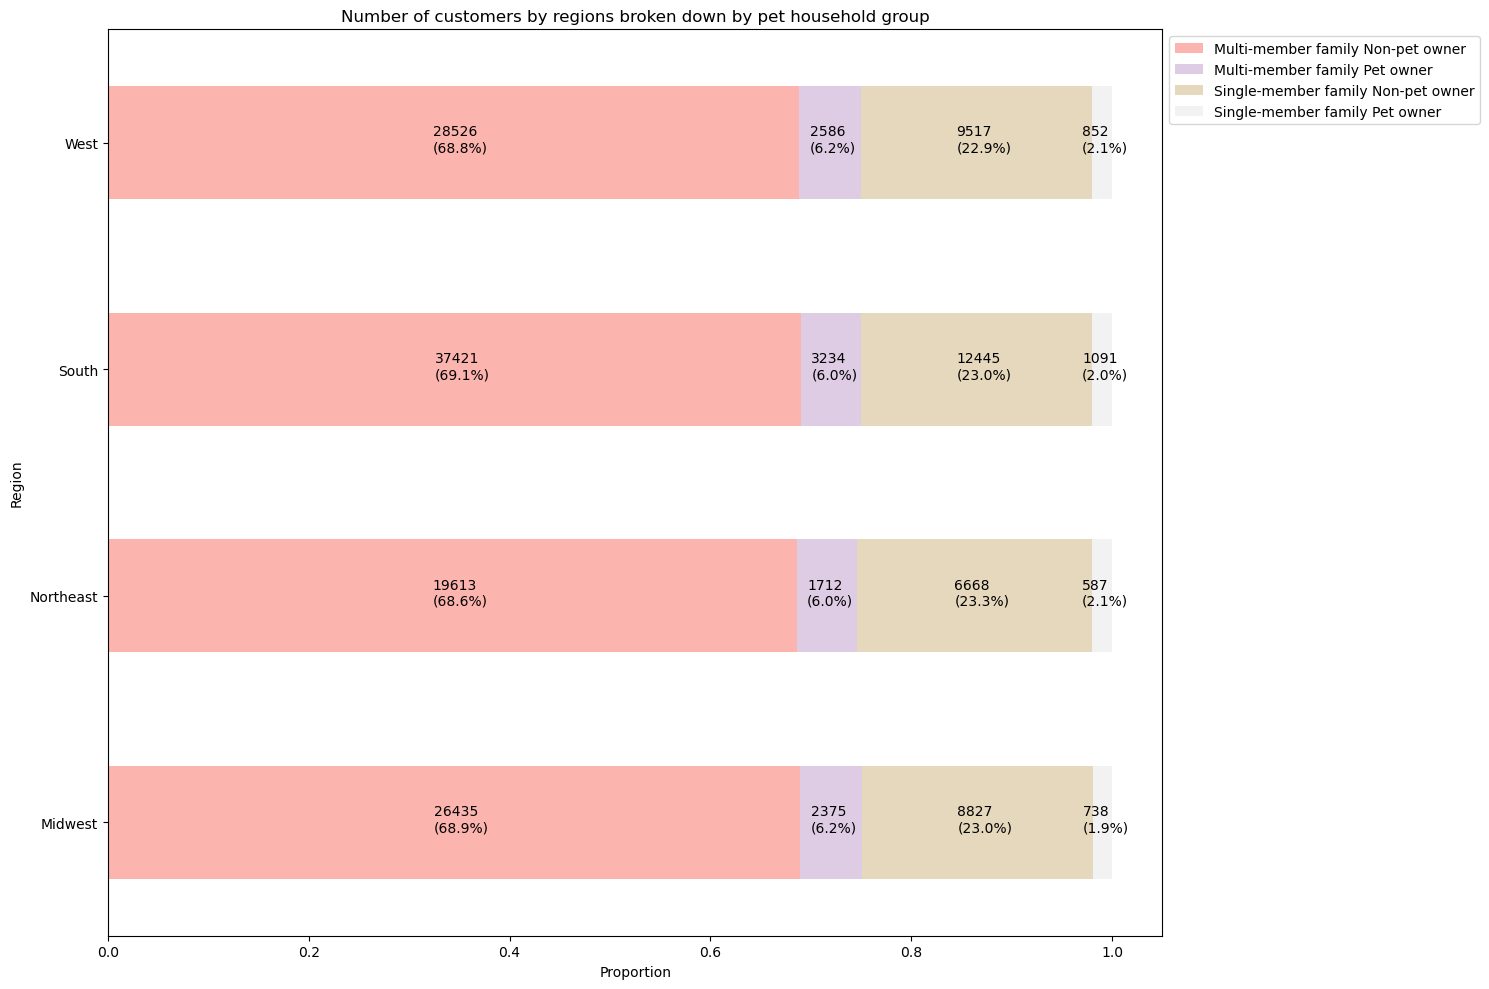

In [74]:
# Create a bar chart using the crosstab results

bar_ph_reg = crosstab_ph_reg_prop.plot.barh(title = 'Number of customers by regions broken down by pet household group', rot=0, figsize = (15,10), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Region")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_ph_reg.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_ph_reg_prop.loc[x], crosstab_ph_reg.loc[x], crosstab_ph_reg_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.02, y=n - 0.04, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [75]:
# Export the chart

bar_ph_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_pet_household.png'))

### 03.04.02. User household and pet ownership profile by departments

In [76]:
# Create a crosstab using with the two variables

crosstab_ph_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['Pet_household'], dropna = False)

In [77]:
# Check the crosstab created

crosstab_ph_dep

Pet_household    Multi-member family Non-pet owner  \
department                                           
alcohol                                      87550   
babies                                      280083   
bakery                                      736296   
beverages                                  1686361   
breakfast                                   448643   
bulk                                         23795   
canned goods                                666988   
dairy eggs                                 3489286   
deli                                        668467   
dry goods pasta                             542976   
frozen                                     1380982   
household                                   427737   
international                               168343   
meat seafood                                449098   
missing                                      43169   
other                                        21857   
pantry                                     1176848   
personal care                               261596   
pets                                             0   
produce                                    6229787   
snacks                                     1847751   

Pet_household    Multi-member family Pet owner  \
department                                       
alcohol                                  20249   
babies                                   26979   
bakery                                  103137   
beverages                               240198   
breakfast                                55775   
bulk                                      1656   
canned goods                             94066   
dairy eggs                              393520   
deli                                     81985   
dry goods pasta                          74864   
frozen                                  211396   
household                               100761   
international                            23187   
meat seafood                             59805   
missing                                   5664   
other                                     3839   
pantry                                  161953   
personal care                            56505   
pets                                     69458   
produce                                 574045   
snacks                                  228217   

Pet_household    Single-member family Non-pet owner  \
department                                            
alcohol                                       30524   
babies                                        94738   
bakery                                       246773   
beverages                                    566184   
breakfast                                    148083   
bulk                                           7536   
canned goods                                 219218   
dairy eggs                                  1163759   
deli                                         225835   
dry goods pasta                              178926   
frozen                                       460947   
household                                    138196   
international                                 56731   
meat seafood                                 146130   
missing                                       14212   
other                                          7360   
pantry                                       390019   
personal care                                 87047   
pets                                              0   
produce                                     2079866   
snacks                                       613470   

Pet_household    Single-member family Pet owner  
department                                       
alcohol                                    6303  
babies                                     8588  
bakery                                    34618  
beverages                                 79154  
breakfast                               

In [78]:
# Export the crosstab

crosstab_ph_dep.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_orders_by_pet_household_and_department.csv'))

In [79]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_ph_dep_prop = pd.crosstab(ords_prods_all['department'], ords_prods_all['Pet_household'], normalize = 'index', dropna = False)

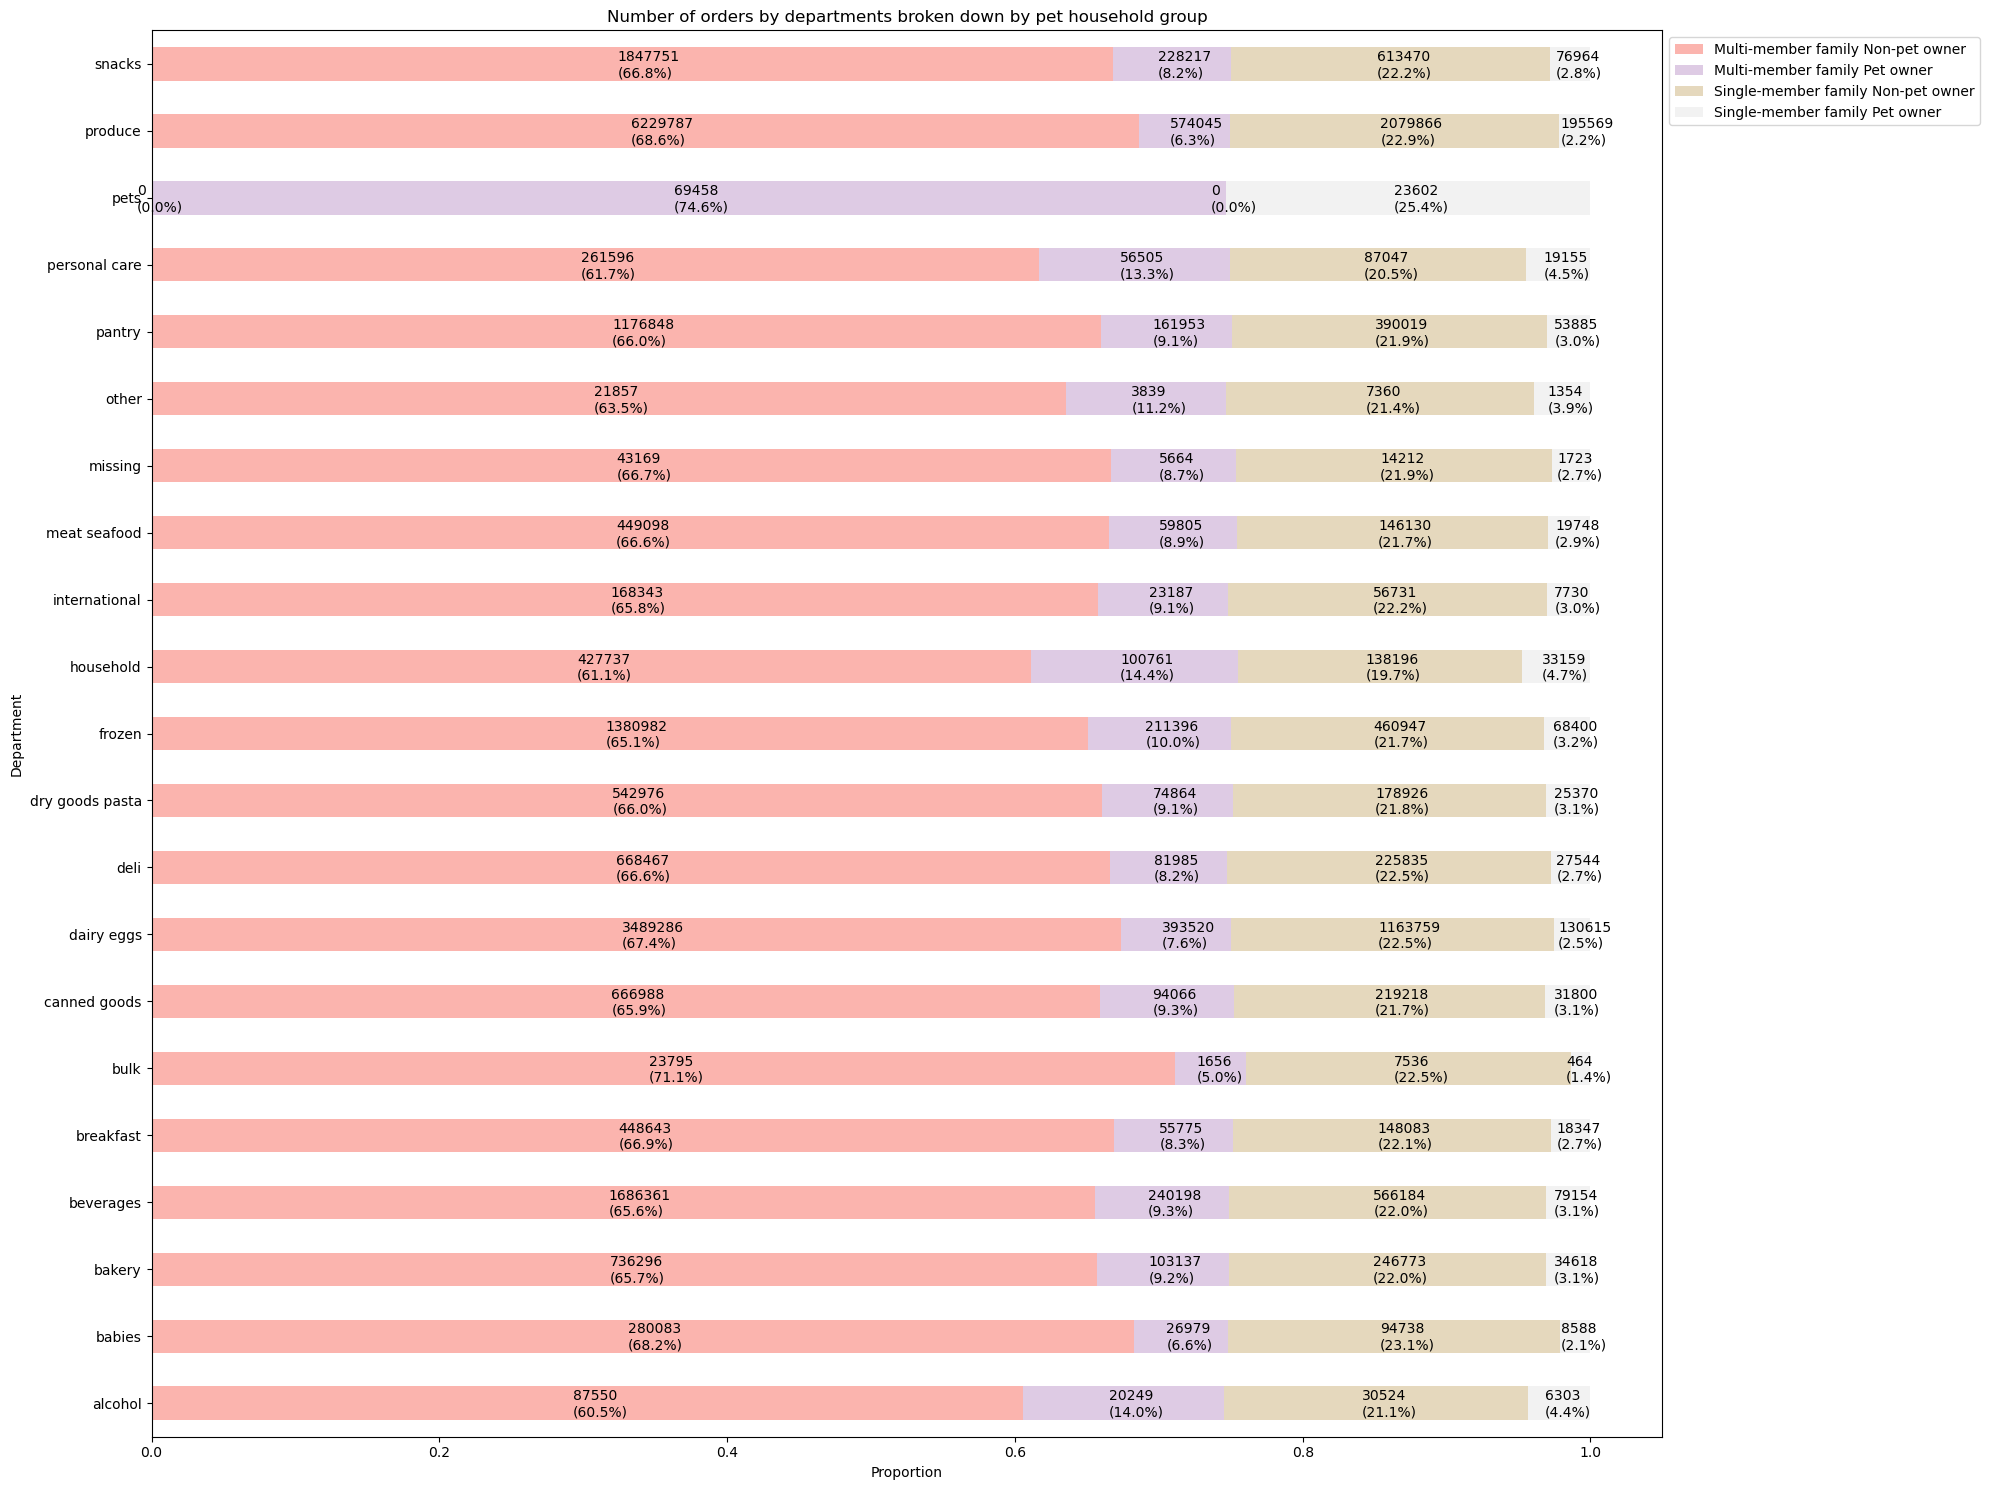

In [80]:
# Create a bar chart using the crosstab results

bar_ph_dep = crosstab_ph_dep_prop.plot.barh(title = 'Number of orders by departments broken down by pet household group', rot=0, figsize = (20,15), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Department")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_aa_dep.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_ph_dep_prop.loc[x], crosstab_ph_dep.loc[x], crosstab_ph_dep_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.01, y=n - 0.2, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [81]:
# Export the chart

bar_ph_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_pet_household.png'))

## 03.05. Analyzing: customer buying power profile

### 03.05.01. User customer buying power profile by regions

In [82]:
# Create a crosstab using with the two variables

crosstab_bp_reg = pd.crosstab(users_unique['Region'], users_unique['buying_power'], dropna = False)

In [83]:
# Check the crosstab created

crosstab_bp_reg

buying_power  Dependant of someone  Dual income with multiple kids  \
Region                                                               
Midwest                       1840                           17975   
Northeast                     1226                           13344   
South                         2604                           25343   
West                          1938                           19498   

buying_power  Dual income with single kid  Single income with no kids  
Region                                                                 
Midwest                              8995                        9565  
Northeast                            6755                        7255  
South                               12708                       13536  
West                                 9676                       10369

In [84]:
# Export the crosstab

crosstab_bp_reg.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_customers_by_buying_power_and_region.csv'))

In [85]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_bp_reg_prop = pd.crosstab(users_unique['Region'], users_unique['buying_power'], normalize = 'index', dropna = False)

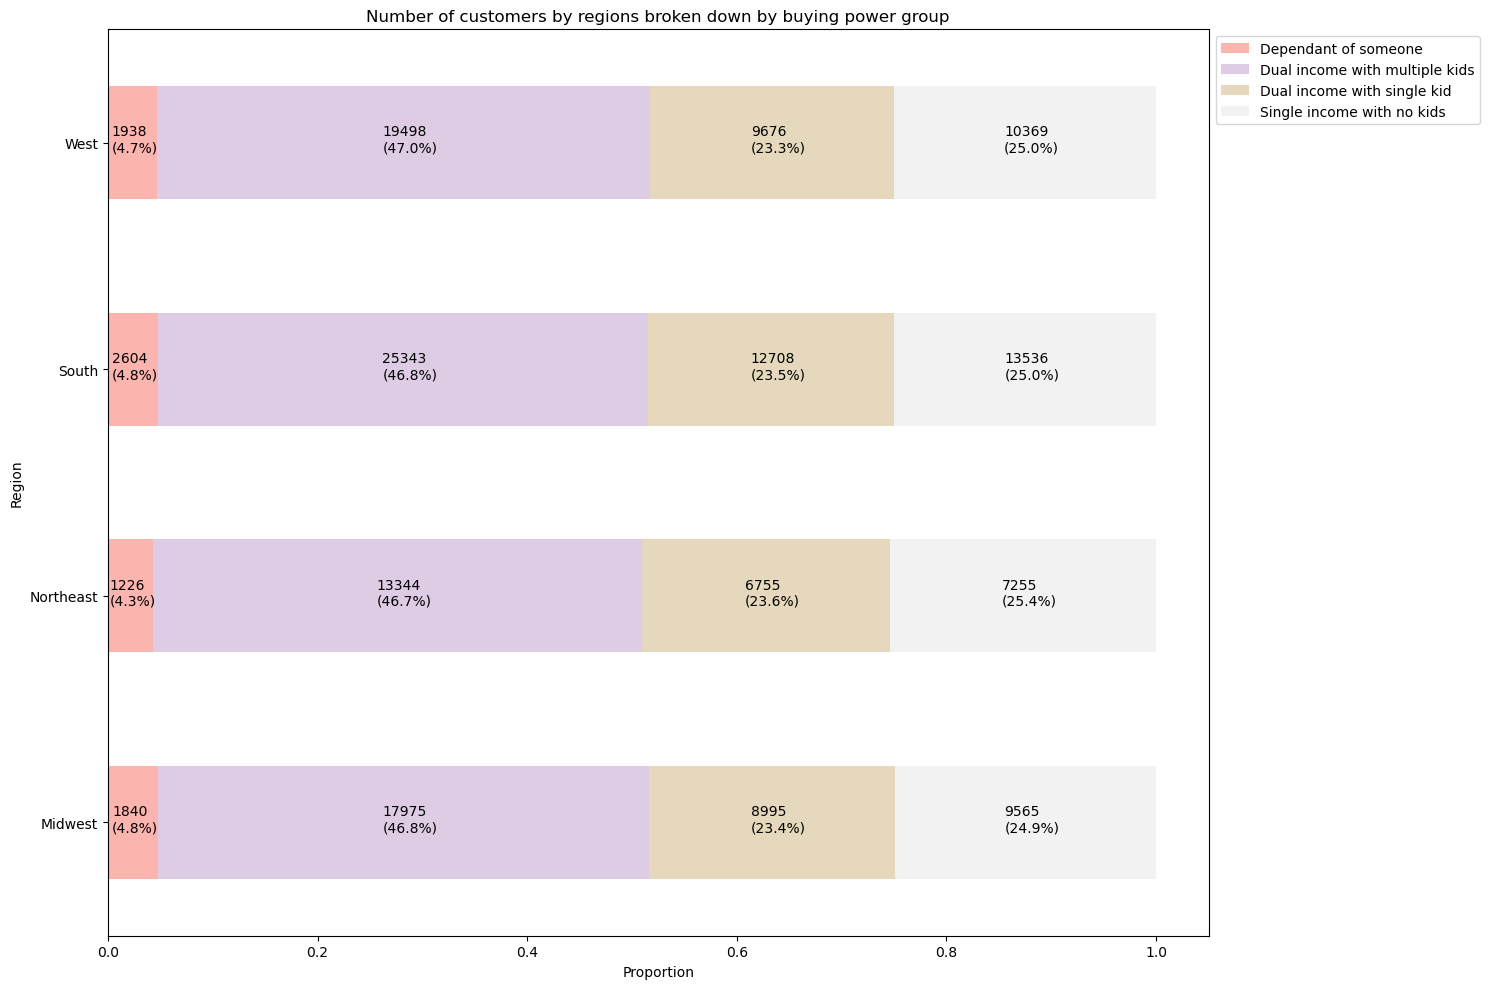

In [120]:
# Create a bar chart using the crosstab results

bar_bp_reg = crosstab_bp_reg_prop.plot.barh(title = 'Number of customers by regions broken down by buying power group', rot=0, figsize = (15,10), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Region")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_bp_reg.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_bp_reg_prop.loc[x], crosstab_bp_reg.loc[x], crosstab_bp_reg_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.02, y=n - 0.04, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [87]:
# Export the chart

bar_bp_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_buying_power.png'))

### 03.05.02. Customer buying power profile by departments

In [88]:
# Create a crosstab using with the two variables

crosstab_bp_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['buying_power'], dropna = False)

In [89]:
# Check the crosstab created

crosstab_bp_dep

buying_power     Dependant of someone  Dual income with multiple kids  \
department                                                              
alcohol                          8379                           66170   
babies                          19381                          194848   
bakery                          53684                          523567   
beverages                      119107                         1209633   
breakfast                       33198                          313272   
bulk                             1633                           15724   
canned goods                    48477                          476452   
dairy eggs                     250207                         2421459   
deli                            48119                          470594   
dry goods pasta                 39542                          387173   
frozen                         102993                          999057   
household                       33349                          330557   
international                   12394                          118700   
meat seafood                    32344                          318215   
missing                          3317                           30600   
other                            1815                           15745   
pantry                          85845                          835734   
personal care                   20201                          198871   
pets                             5338                           42732   
produce                        430539                         4262296   
snacks                         131310                         1301249   

buying_power     Dual income with single kid  Single income with no kids  
department                                                                
alcohol                                33250                       36827  
babies                                 92833                      103326  
bakery                                262182                      281391  
beverages                             597819                      645338  
breakfast                             157948                      166430  
bulk                                    8094                        8000  
canned goods                          236125                      251018  
dairy eggs                           1211140                     1294374  
deli                                  231739                      253379  
dry goods pasta                       191125                      204296  
frozen                                490328                      529347  
household                             164592                      171355  
international                          60436                       64461  
meat seafood                          158344                      165878  
missing                                14916                       15935  
other                                   8136                        8714  
pantry                                417222                      443904  
personal care                          99029                      106202  
pets                                   21388                       23602  
produce                              2110997                     2275435  
snacks                                643409                      690434

In [90]:
# Export the crosstab

crosstab_bp_dep.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_orders_by_buying_power_and_department.csv'))

In [91]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_bp_dep_prop = pd.crosstab(ords_prods_all['department'], ords_prods_all['buying_power'], normalize = 'index', dropna = False)

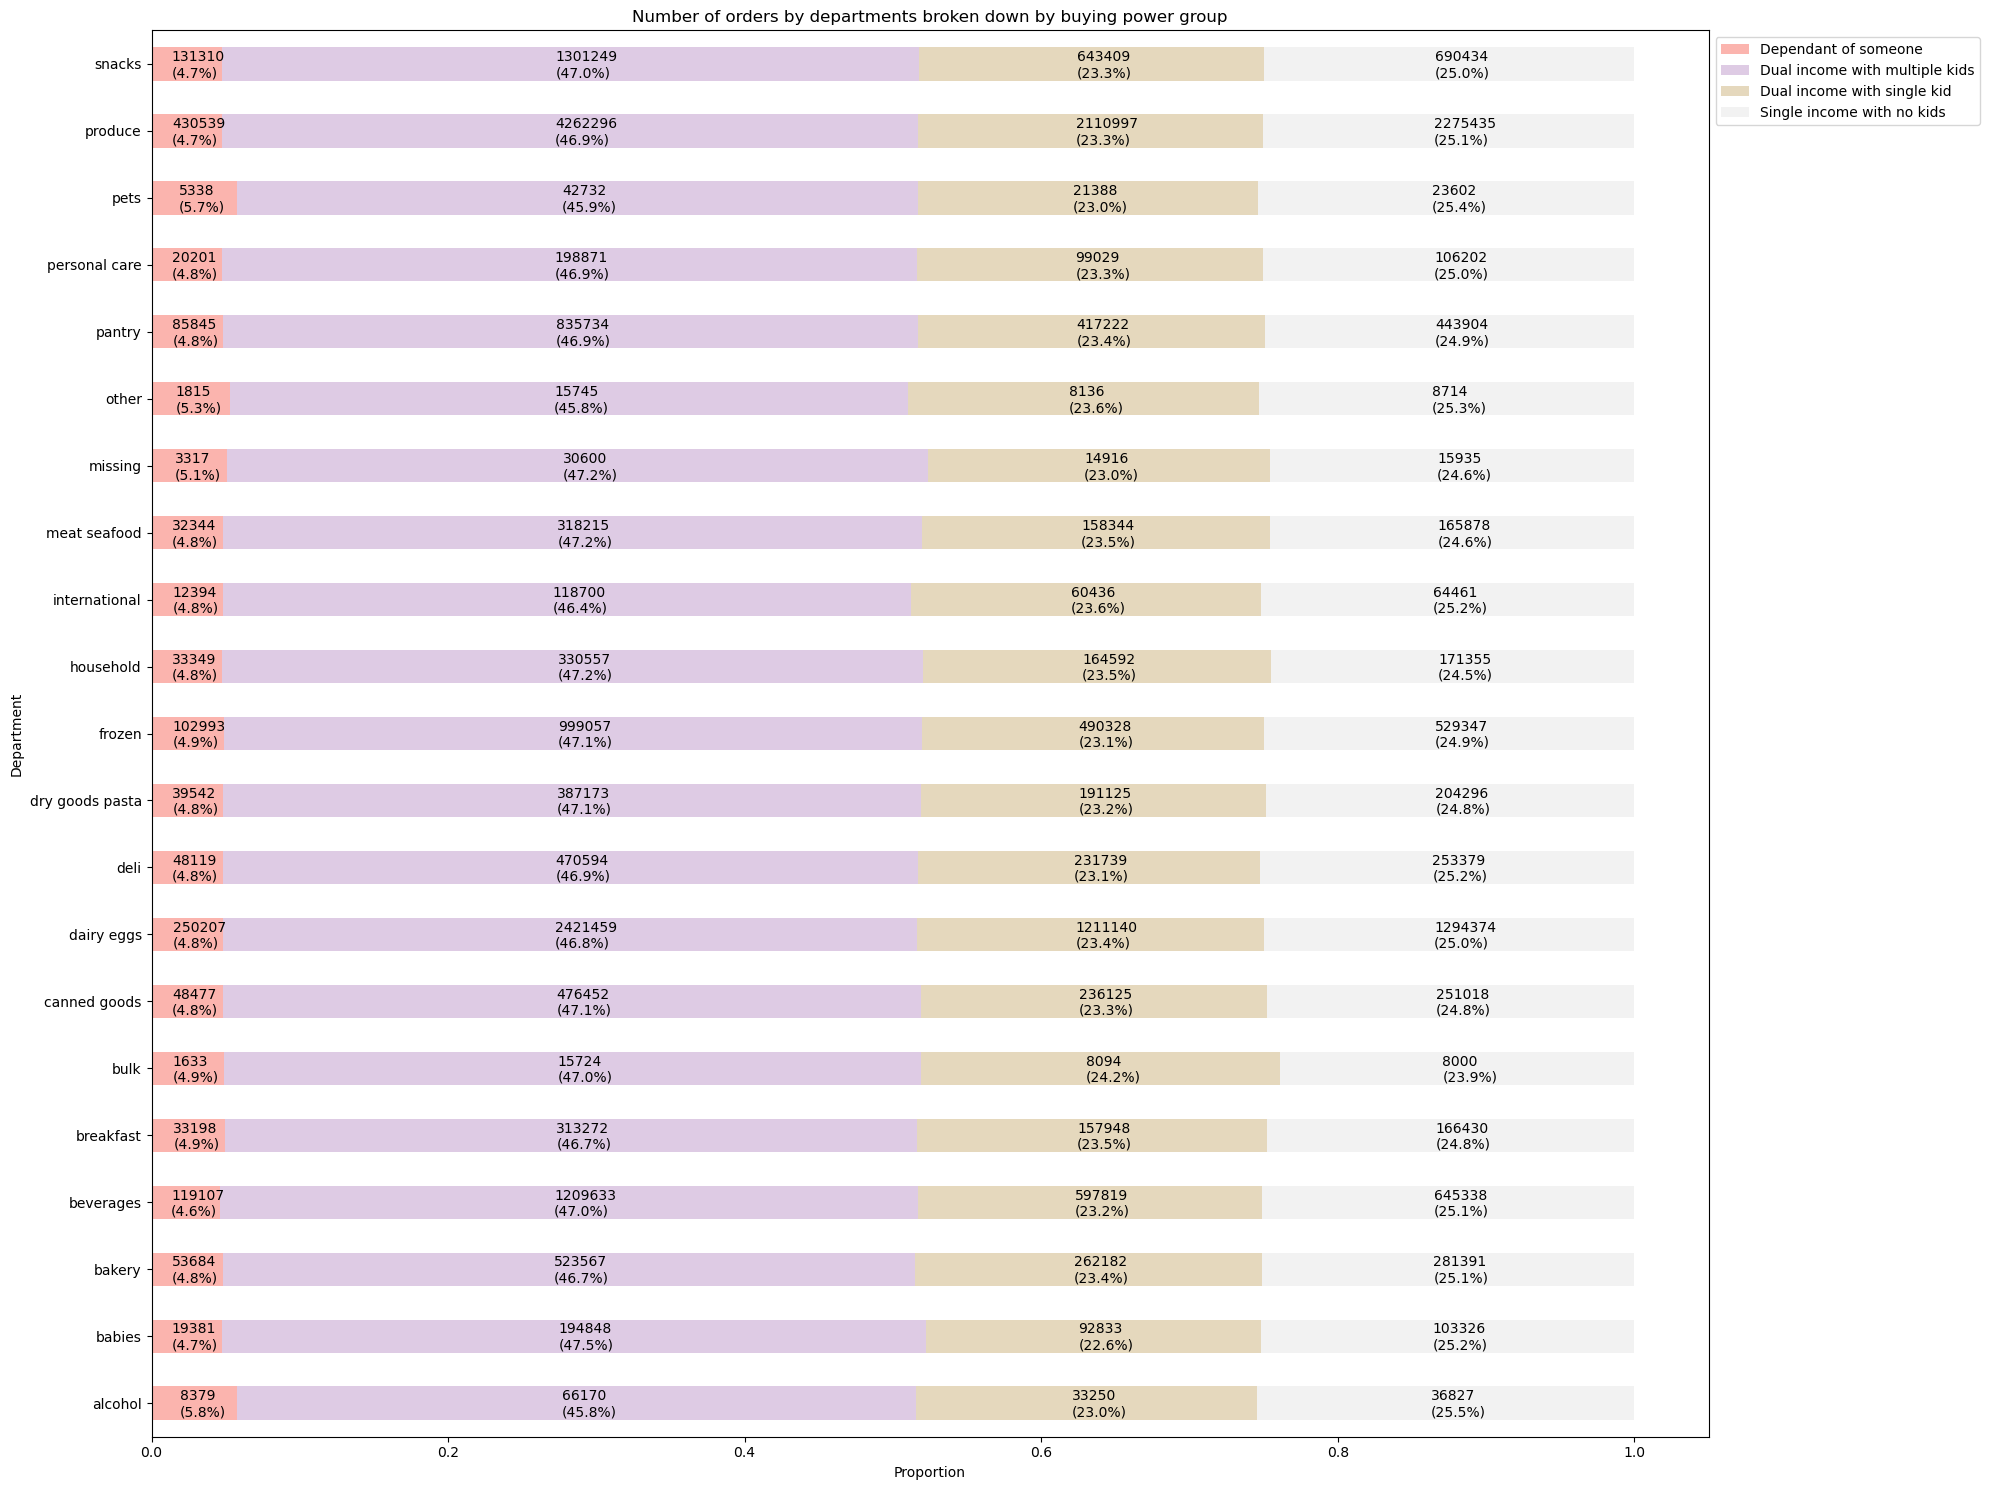

In [92]:
# Create a bar chart using the crosstab results

bar_bp_dep = crosstab_bp_dep_prop.plot.barh(title = 'Number of orders by departments broken down by buying power group', rot=0, figsize = (20,15), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Department")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_bp_dep.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_bp_dep_prop.loc[x], crosstab_bp_dep.loc[x], crosstab_bp_dep_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.01, y=n - 0.2, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [93]:
# Export the chart

bar_bp_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_buying_power.png'))

## 03.06. Analyzing: customer preferred shopping time profile

### 03.06.01. Customer preferred shopping time profile by regions

In [94]:
# Create a crosstab using with the two variables

crosstab_pt_reg = pd.crosstab(users_unique['Region'], users_unique['user_preferred_shop_time'], dropna = False)

In [95]:
# Check the crosstab created

crosstab_pt_reg

user_preferred_shop_time  Weekday afternoon shopper  Weekday evening shopper  \
Region                                                                         
Midwest                                       14095                     6446   
Northeast                                     10666                     4723   
South                                         19918                     9017   
West                                          15433                     6819   

user_preferred_shop_time  Weekday morning shopper  Weekday night shopper  \
Region                                                                     
Midwest                                      6098                   1954   
Northeast                                    4494                   1473   
South                                        8647                   2811   
West                                         6458                   2052   

user_preferred_shop_time  Weekend afternoon shopper  Weekend evening shopper  \
Region                                                                         
Midwest                                        5236                     1861   
Northeast                                      3846                     1385   
South                                          7343                     2649   
West                                           5669                     2100   

user_preferred_shop_time  Weekend morning shopper  Weekend night shopper  
Region                                                                    
Midwest                                      2146                    539  
Northeast                                    1590                    403  
South                                        2998                    808  
West                                         2291                    659

In [96]:
# Export the crosstab

crosstab_pt_reg.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_customers_by_preferred_shop_time_and_region.csv'))

In [97]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_pt_reg_prop = pd.crosstab(users_unique['Region'], users_unique['user_preferred_shop_time'], normalize = 'index', dropna = False)

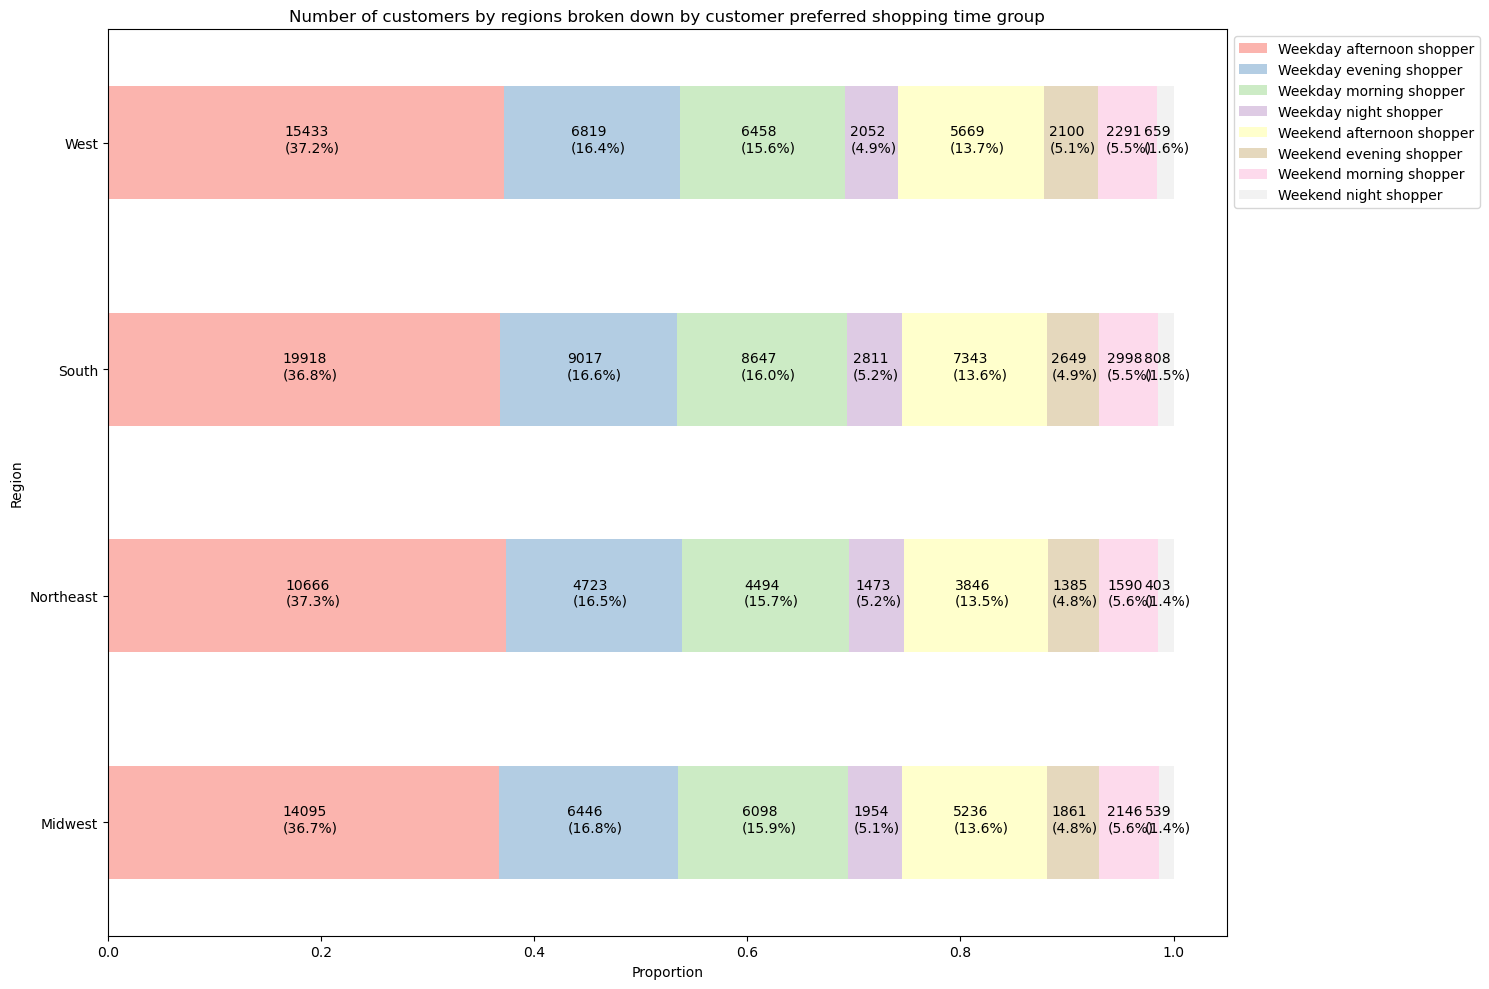

In [98]:
# Create a bar chart using the crosstab results

bar_pt_reg = crosstab_pt_reg_prop.plot.barh(title = 'Number of customers by regions broken down by customer preferred shopping time group', rot=0, figsize = (15,10), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Region")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_bp_reg.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_pt_reg_prop.loc[x], crosstab_pt_reg.loc[x], crosstab_pt_reg_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.02, y=n - 0.04, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [99]:
# Export the chart

bar_pt_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_preferred_shop_time.png'))

### 03.06.02. Customer preferred shopping time profile by departments

In [100]:
# Create a crosstab using with the two variables

crosstab_pt_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['user_preferred_shop_time'], dropna = False)

In [101]:
# Check the crosstab created

crosstab_pt_dep

user_preferred_shop_time  Weekday afternoon shopper  Weekday evening shopper  \
department                                                                     
alcohol                                       72197                    27246   
babies                                       166755                    49000   
bakery                                       449336                   168288   
beverages                                   1059135                   404711   
breakfast                                    261184                    94293   
bulk                                          13468                     4592   
canned goods                                 397307                   145256   
dairy eggs                                  2035529                   732400   
deli                                         393263                   148553   
dry goods pasta                              315794                   124518   
frozen                                       828659                   365645   
household                                    280601                   118369   
international                                100880                    37714   
meat seafood                                 259932                   100910   
missing                                       25570                    10133   
other                                         14232                     5915   
pantry                                       726263                   264064   
personal care                                169079                    77742   
pets                                          38244                    20434   
produce                                     3511147                  1242807   
snacks                                      1134547                   383747   

user_preferred_shop_time  Weekday morning shopper  Weekday night shopper  \
department                                                                 
alcohol                                     22791                   3192   
babies                                      83434                  23706   
bakery                                     190012                  49753   
beverages                                  463056                 106226   
breakfast                                  122102                  31809   
bulk                                         5787                   1645   
canned goods                               157105                  51107   
dairy eggs                                 938133                 249095   
deli                                       161900                  46491   
dry goods pasta                            129664                  42512   
frozen                                     333068                 107977   
household                                  131061                  34308   
international                               39707                  12943   
meat seafood                               106910                  32400   
missing                                     10855                   3361   
other                                        5802                   1598   
pantry                                     298501                  86717   
personal care                               71396                  20663   
pets                                        13607                   4470   
produce                                   1554032                 474223   
snacks                                     477631                 115781   

user_preferred_shop_time  Weekend afternoon shopper  Weekend evening shopper  \
department                                                                     
alcohol                                       11405                     2848   
babies                                        45596                    11537   
bakery                                       146340                    39424   
beverages 

In [102]:
# Export the crosstab

crosstab_pt_dep.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_orders_by_preferred_shopping_time_and_department.csv'))

In [103]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_pt_dep_prop = pd.crosstab(ords_prods_all['department'], ords_prods_all['user_preferred_shop_time'], normalize = 'index', dropna = False)

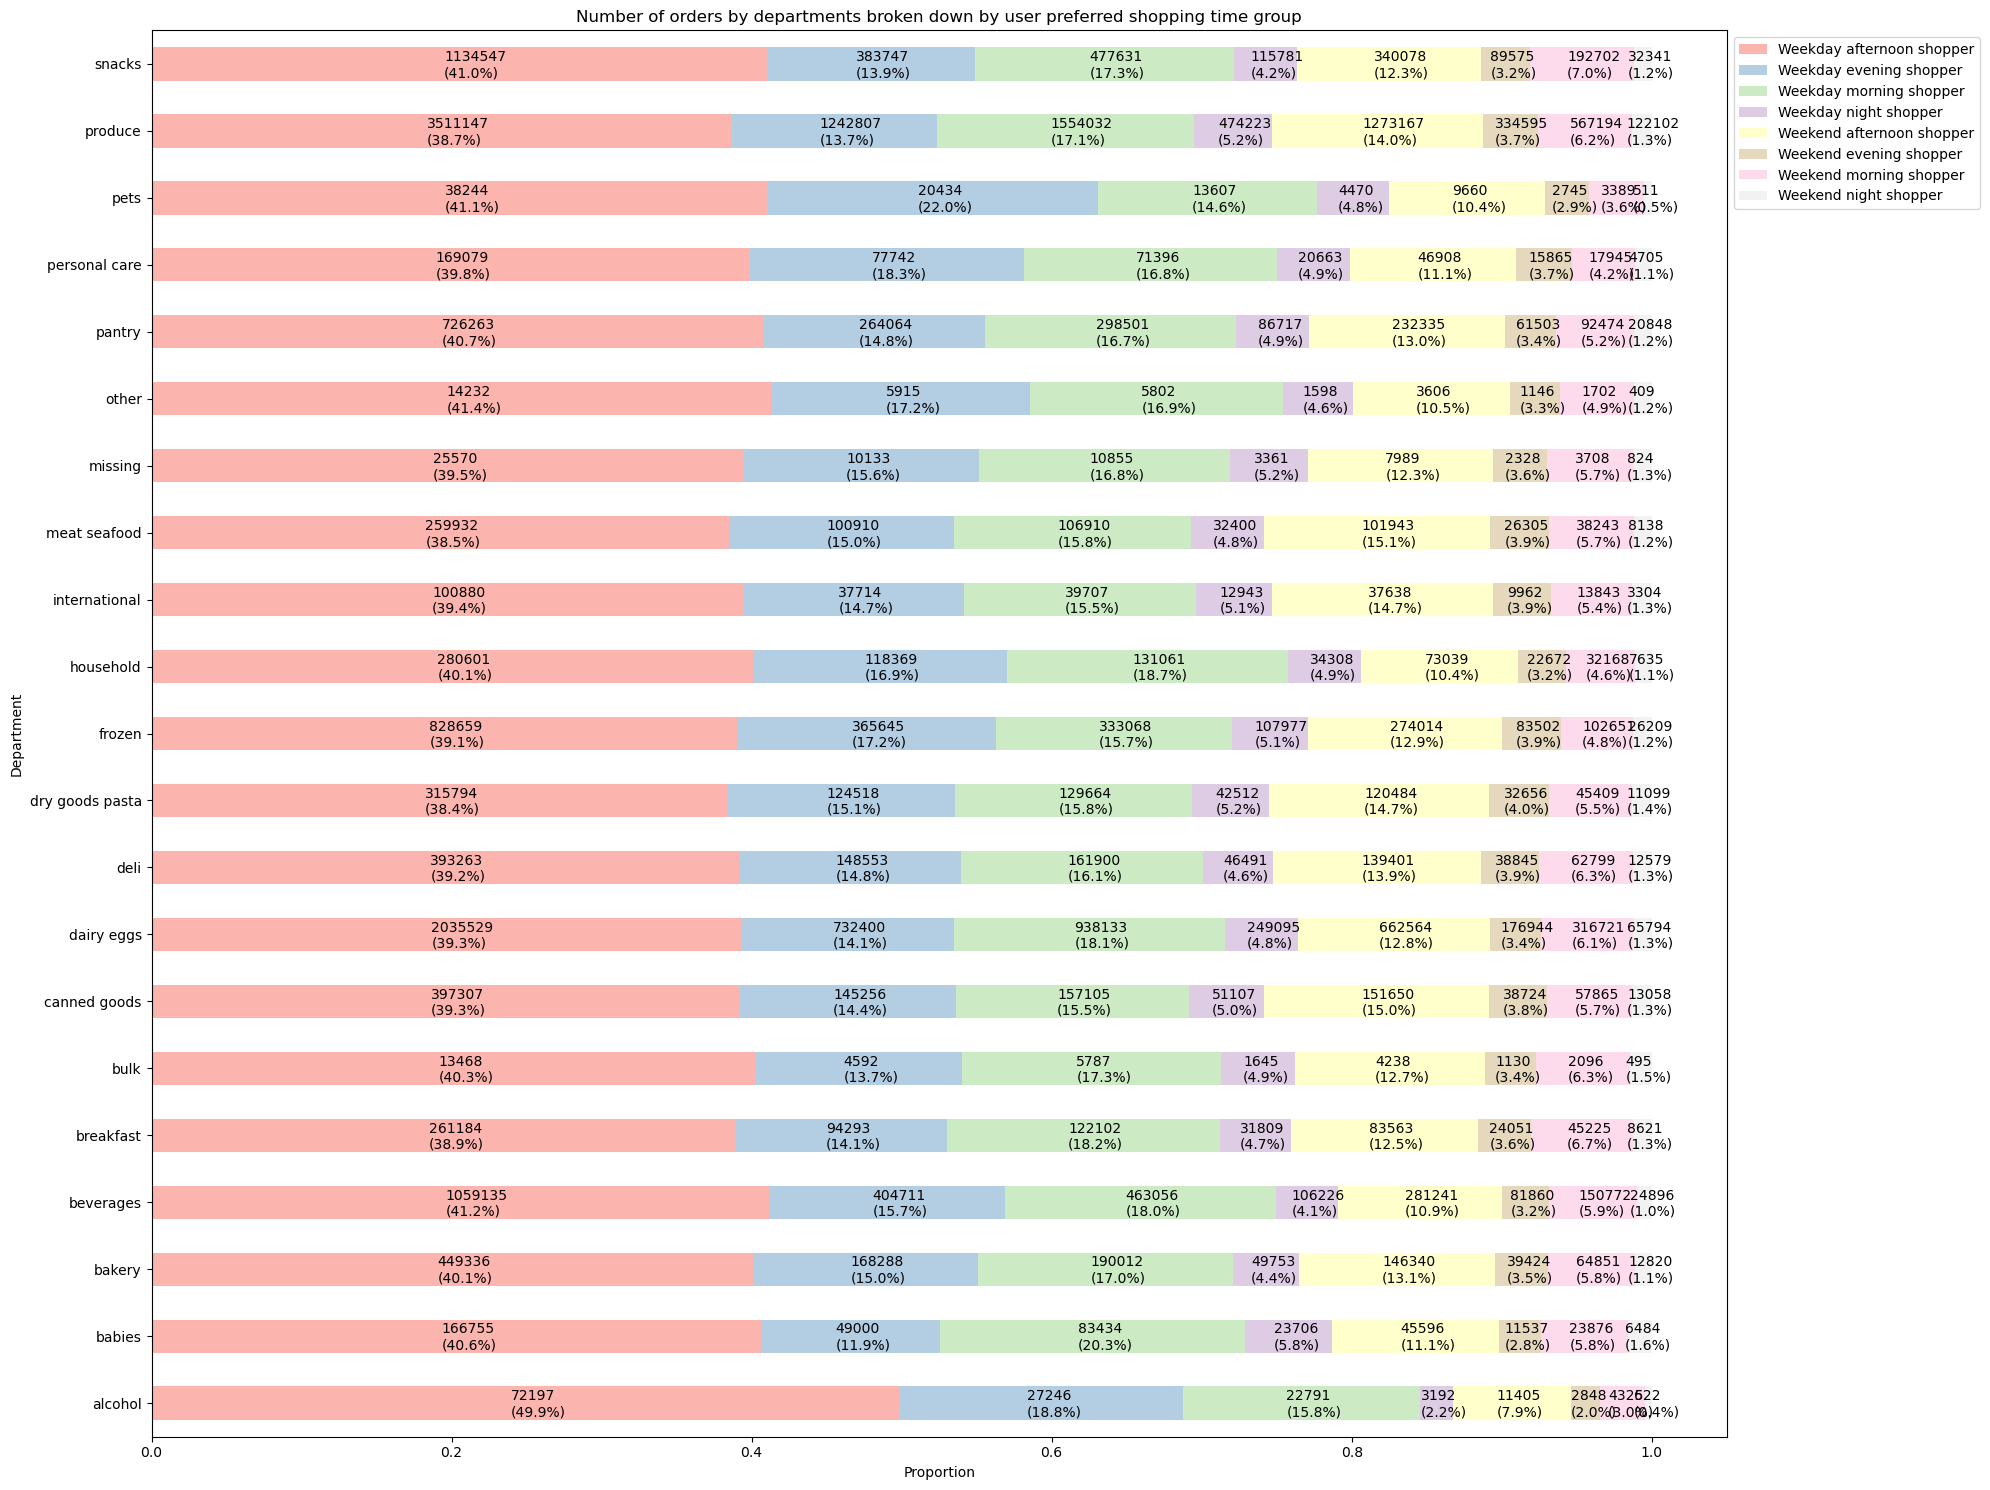

In [104]:
# Create a bar chart using the crosstab results

bar_pt_dep = crosstab_pt_dep_prop.plot.barh(title = 'Number of orders by departments broken down by user preferred shopping time group', rot=0, figsize = (20,15), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Department")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_pt_dep.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_pt_dep_prop.loc[x], crosstab_pt_dep.loc[x], crosstab_pt_dep_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.01, y=n - 0.2, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [105]:
# Export the chart

bar_pt_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_preferred_shopping_time.png'))

## 03.07. Analyzing: loyalty status profile

### 03.07.01. Loyalty status profile by regions

In [106]:
# Create a crosstab using with the two variables

crosstab_loyalty_reg = pd.crosstab(users_unique['Region'], users_unique['loyalty_flag'], dropna = False)

In [107]:
# Check the crosstab created

crosstab_loyalty_reg

loyalty_flag  Loyal customer  New customer  Regular customer
Region                                                      
Midwest                 3991         16189             18195
Northeast               3027         12061             13492
South                   5637         22945             25609
West                    4362         17551             19568

In [108]:
# Export the crosstab

crosstab_loyalty_reg.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_customers_by_loyalty_status_and_region.csv'))

In [109]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_loyalty_reg_prop = pd.crosstab(users_unique['Region'], users_unique['loyalty_flag'], normalize = 'index', dropna = False)

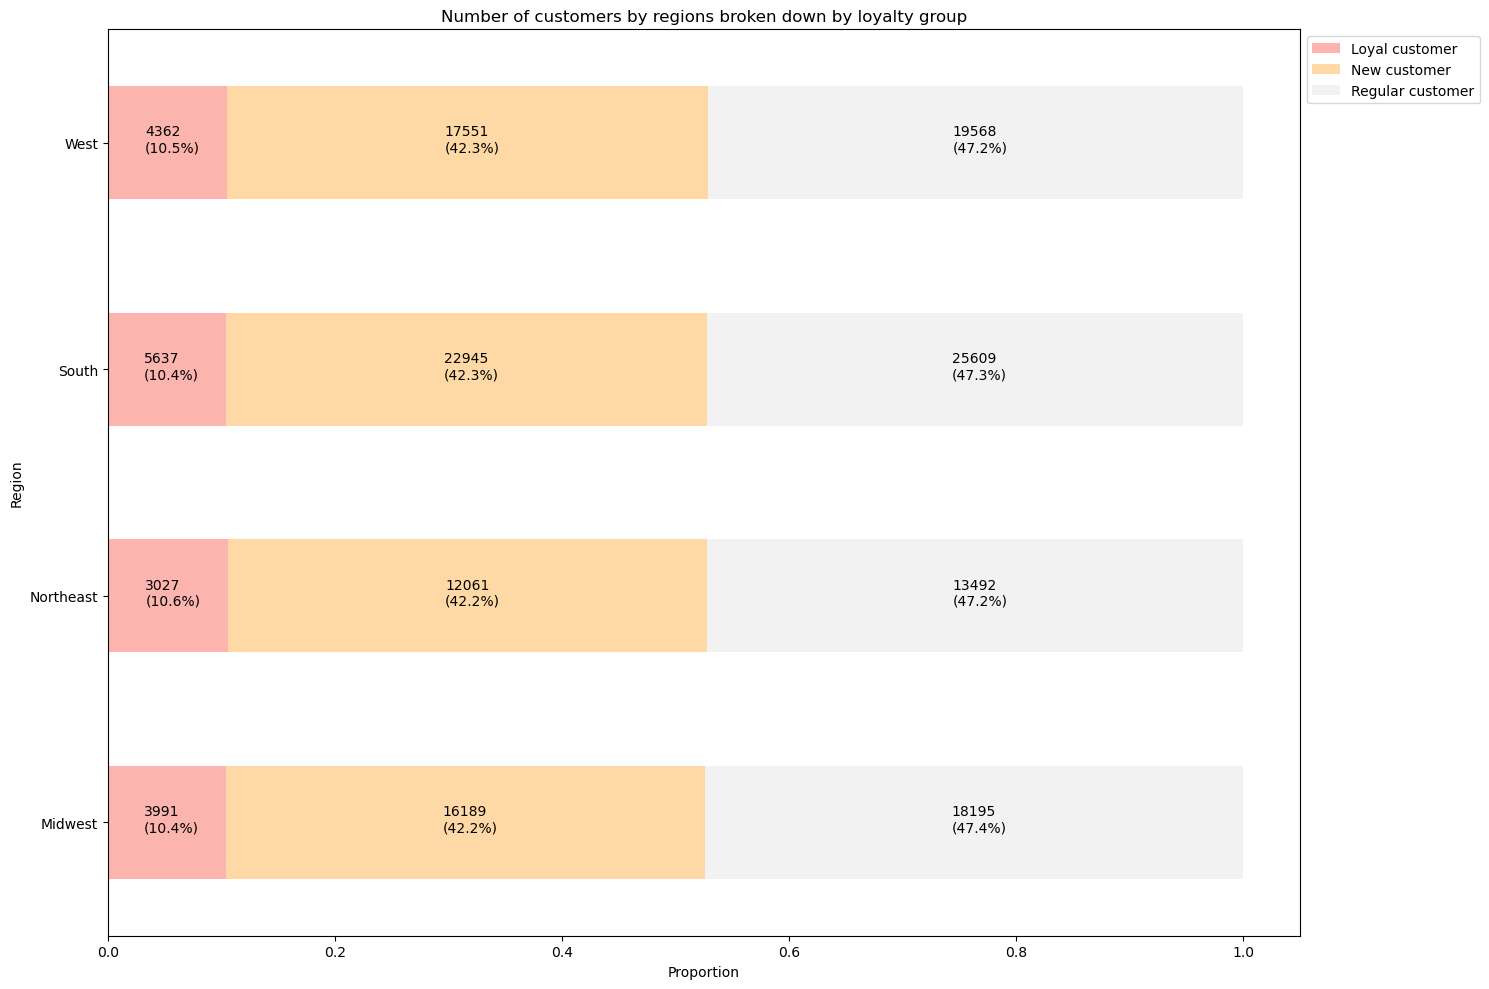

In [110]:
# Create a bar chart using the crosstab results

bar_loyalty_reg = crosstab_loyalty_reg_prop.plot.barh(title = 'Number of customers by regions broken down by loyalty group', rot=0, figsize = (15,10), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Region")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_loyalty_reg.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_loyalty_reg_prop.loc[x], crosstab_loyalty_reg.loc[x], crosstab_loyalty_reg_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.02, y=n - 0.04, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [111]:
# Export the chart

bar_loyalty_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_loyalty_status.png'))

### 03.07.02. Customer preferred shopping time profile by departments

In [112]:
# Create a crosstab using with the two variables

crosstab_loyalty_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['loyalty_flag'], dropna = False)

In [113]:
# Check the crosstab created

crosstab_loyalty_dep

loyalty_flag     Loyal customer  New customer  Regular customer
department                                                     
alcohol                   38723         28628             77275
babies                   167108         46704            196576
bakery                   379873        172100            568851
beverages                855017        396645           1320235
breakfast                221577        106177            343094
bulk                      13834          4149             15468
canned goods             294594        180194            537284
dairy eggs              1830707        750054           2596419
deli                     324046        158332            521453
dry goods pasta          242580        144836            434720
frozen                   609460        372265           1140000
household                196873        128113            374867
international             78394         43841            133756
meat seafood             202480        112464            359837
missing                   18350         12713             33705
other                     10715          5838             17857
pantry                   560402        299576            922727
personal care            123365         75439            225499
pets                      25469         15880             51711
produce                 3147376       1336598           4595293
snacks                   943150        413103           1410149

In [114]:
# Export the crosstab

crosstab_loyalty_dep.to_csv(os.path.join(path, '04 Analysis', 'Reports', 'n_orders_by_loyalty_status_and_department.csv'))

In [115]:
# 100% stacked bar chart will be created for a better comparison of variable groups

# Create the same crosstab, but in proportional values for charting

crosstab_loyalty_dep_prop = pd.crosstab(ords_prods_all['department'], ords_prods_all['loyalty_flag'], normalize = 'index', dropna = False)

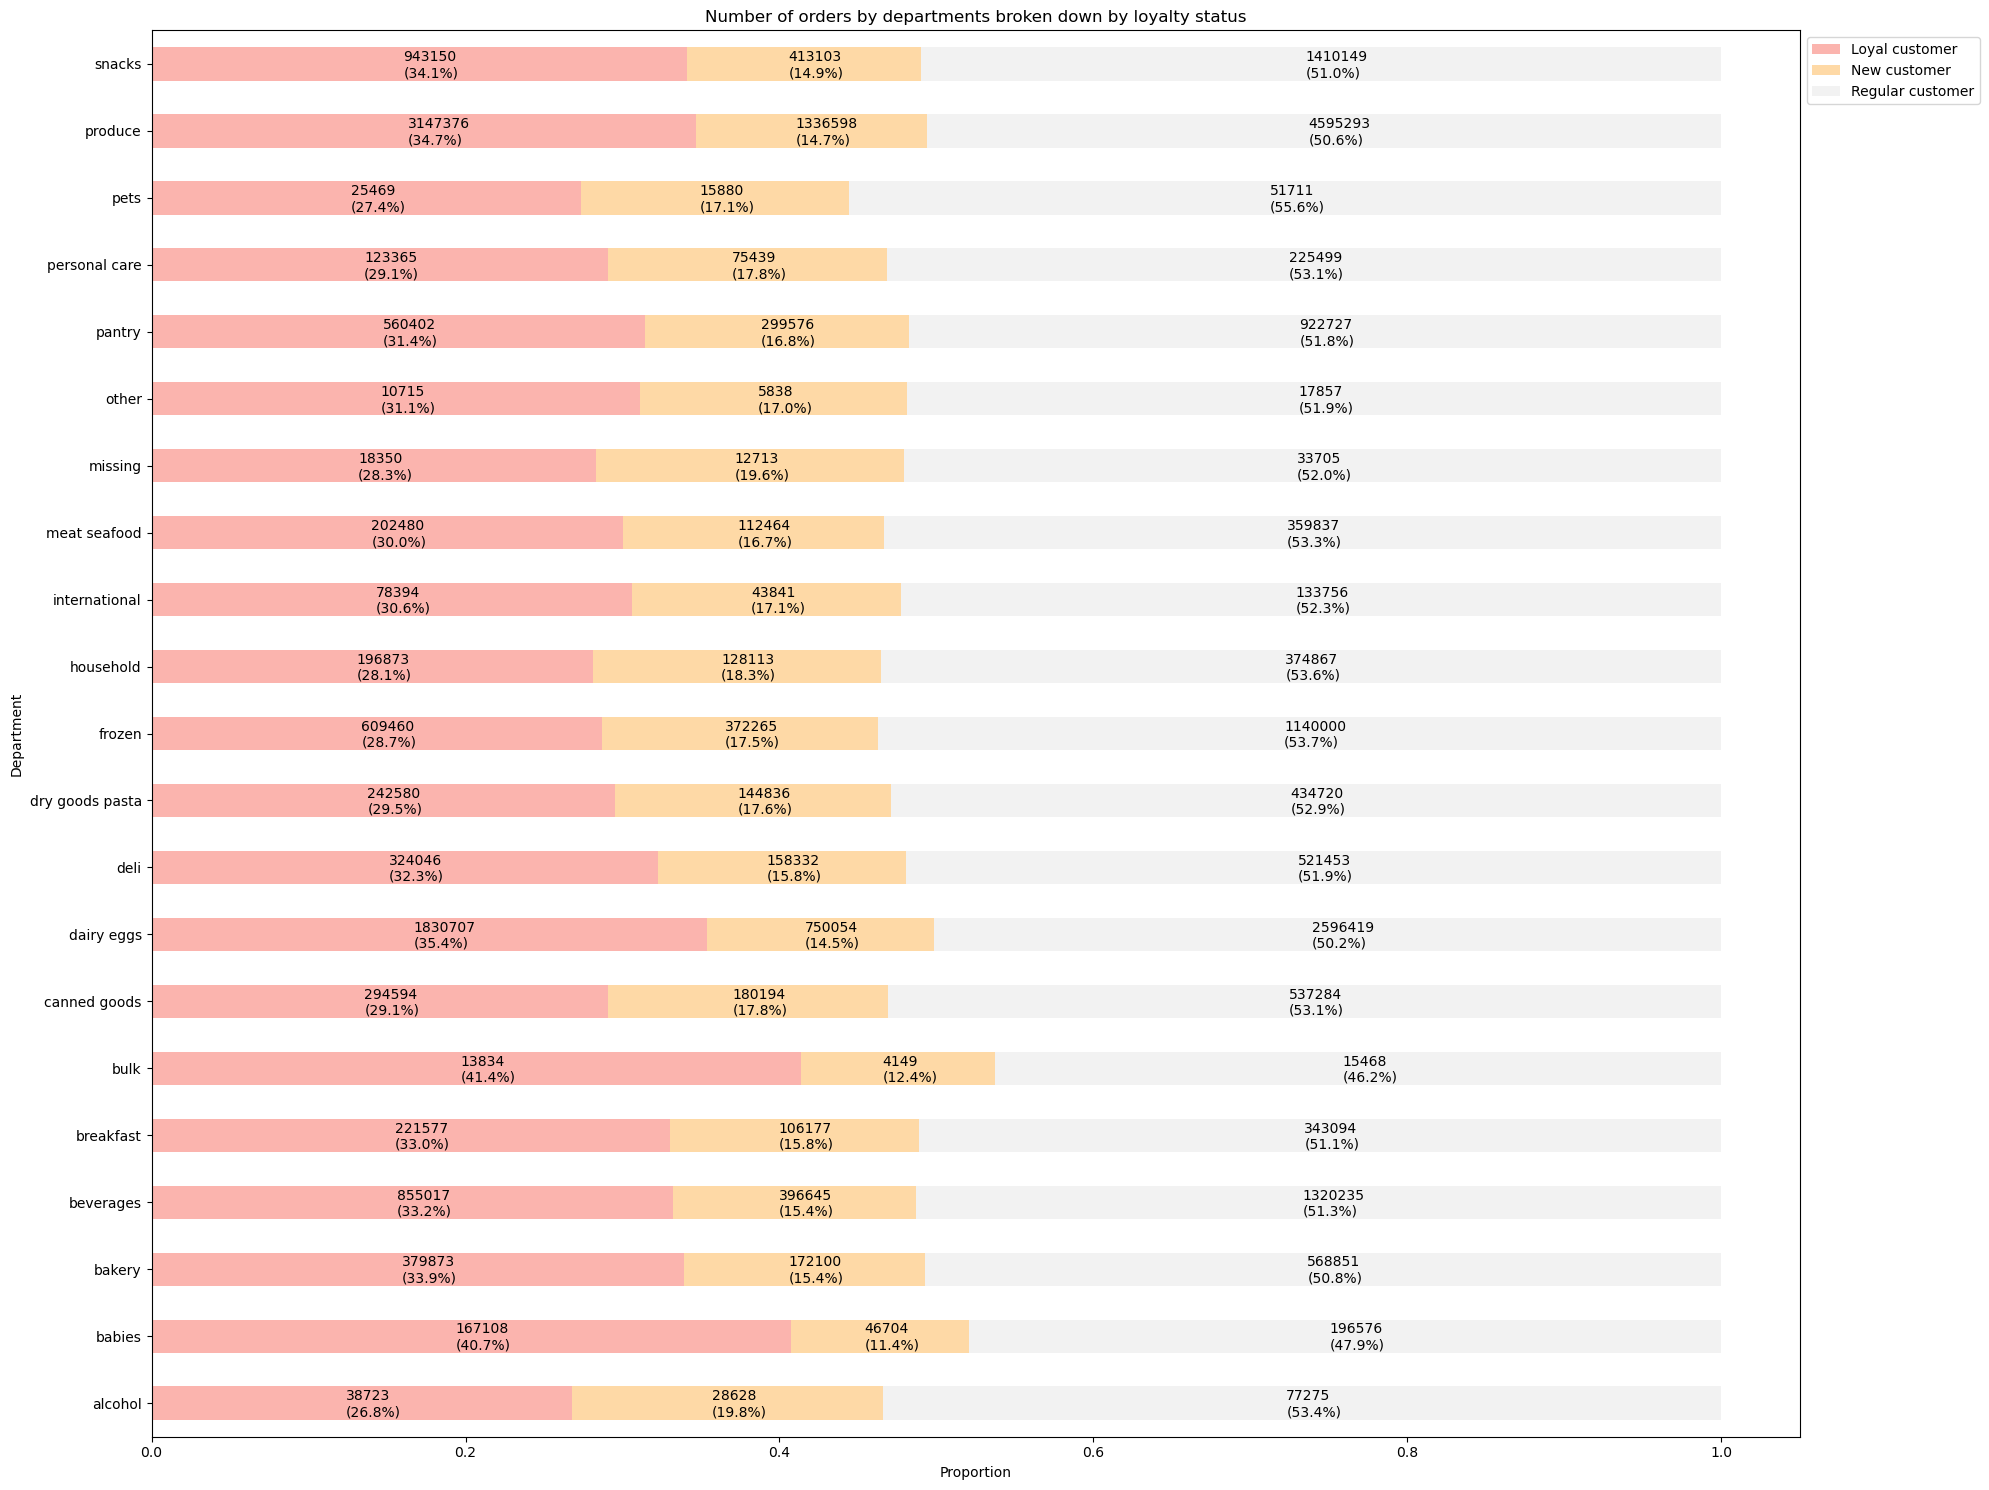

In [116]:
# Create a bar chart using the crosstab results

bar_loyalty_dep = crosstab_loyalty_dep_prop.plot.barh(title = 'Number of orders by departments broken down by loyalty status', rot=0, figsize = (20,15), colormap = 'Pastel1', stacked = True)

# Format axis and labels

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', ncol=1)
plt.xlabel("Proportion")
plt.ylabel("Department")

# Turn the stacked bar chart above into 100% stacked bar chart for a better comparison

for n, x in enumerate([*crosstab_loyalty_dep.index.values]):
    for (proportion, count, y_loc) in zip(crosstab_loyalty_dep_prop.loc[x], crosstab_loyalty_dep.loc[x], crosstab_loyalty_dep_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2) - 0.01, y=n - 0.2, s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black", fontsize=10)
        
# Display the chart

plt.show()

In [117]:
# Export the chart

bar_loyalty_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_loyalty_status.png'))

# 04. Export data

In [118]:
# Exporting the master dataframe again as it was modified in this notebook

ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))